# Tarea 1 Redes Neuronales


## 1.- Predicción del precio de una casa


<h3>Pregunta a</h3>
En primer lugar se debe trabajar con el dataset *Boston Housing Data*, el cual consta de 506 isntancias las cuales presentan 14 atributos (13 de ellos continuos y 1 binario) sin valores *missing*. Por motivos de implementación se debe transformar el atributo *CHAS* a categórico, de modo que el atributo binario se dividirá en 2 atributos distintos *CHAS_0* y *CHAS_1* los cuales pueden tener valores 0 ó 1 y son excluyentes, es decir si por ejemplo *CHAS_0* es 1, *CHAS_1* necesariamente tiene que ser 0. *CHAS_0* indica si la casa no esta en un tramo con rio, mientras *CHAS_1* indica si la casa está en un tramo con rio.

In [238]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()


# normalizar datos
from sklearn.preprocessing import StandardScaler

# train data
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = X_train_scaled.pop('MEDV').values.reshape(-1,1)
#X_train_scaled.pop('MEDV').values.reshape(-1,1)

#test data
scaler_test = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler_test.transform(df_test),columns=df_test.columns)
y_test = X_test_scaled.pop('MEDV').values.reshape(-1,1)
#X_test_scaled.pop('MEDV').values.reshape(-1,1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


<h3>Pregunta b</h3>
Se observa que la curva obtenida es muy irregular, esto puede deberse a que los pasos que da el algoritmo en dirección del gradiente se modifican en cuanto a dirección constantemente.

In [243]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 22s 59ms/step - loss: 1.0267 - val_loss: 0.9834
Epoch 2/300
379/379 [==============================] - 0s 165us/step - loss: 0.9739 - val_loss: 1.0155
Epoch 3/300
379/379 [==============================] - 0s 114us/step - loss: 0.9735 - val_loss: 0.9954
Epoch 4/300
379/379 [==============================] - 0s 105us/step - loss: 0.9540 - val_loss: 0.9141
Epoch 5/300
379/379 [==============================] - 0s 132us/step - loss: 0.9125 - val_loss: 0.9082
Epoch 6/300
379/379 [==============================] - 0s 146us/step - loss: 0.8749 - val_loss: 0.8727
Epoch 7/300
379/379 [==============================] - 0s 111us/step - loss: 0.8418 - val_loss: 0.9225
Epoch 8/300
379/379 [==============================] - 0s 118us/step - loss: 0.8031 - val_loss: 0.8154
Epoch 9/300
379/379 [==============================] - 0s 108us/step - loss: 0.7735 - val_loss: 0.7871
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 116us/step - loss: 0.2614 - val_loss: 0.4185
Epoch 80/300
379/379 [==============================] - 0s 110us/step - loss: 0.2485 - val_loss: 0.4313
Epoch 81/300
379/379 [==============================] - 0s 129us/step - loss: 0.2495 - val_loss: 0.4167
Epoch 82/300
379/379 [==============================] - 0s 116us/step - loss: 0.2529 - val_loss: 0.4184
Epoch 83/300
379/379 [==============================] - 0s 140us/step - loss: 0.2551 - val_loss: 0.4404
Epoch 84/300
379/379 [==============================] - 0s 123us/step - loss: 0.2485 - val_loss: 0.4195
Epoch 85/300
379/379 [==============================] - 0s 116us/step - loss: 0.2534 - val_loss: 0.4147
Epoch 86/300
379/379 [==============================] - 0s 115us/step - loss: 0.2590 - val_loss: 0.4149
Epoch 87/300
379/379 [==============================] - 0s 137us/step - loss: 0.2553 - val_loss: 0.4126
Epoch 88/300
379/379 [==============================] - 0s 125us/step - loss:

379/379 [==============================] - 0s 126us/step - loss: 0.2412 - val_loss: 0.4031
Epoch 158/300
379/379 [==============================] - 0s 112us/step - loss: 0.2498 - val_loss: 0.3941
Epoch 159/300
379/379 [==============================] - 0s 111us/step - loss: 0.2387 - val_loss: 0.3961
Epoch 160/300
379/379 [==============================] - 0s 118us/step - loss: 0.2387 - val_loss: 0.3929
Epoch 161/300
379/379 [==============================] - 0s 133us/step - loss: 0.2407 - val_loss: 0.4034
Epoch 162/300
379/379 [==============================] - 0s 123us/step - loss: 0.2426 - val_loss: 0.3948
Epoch 163/300
379/379 [==============================] - 0s 130us/step - loss: 0.2454 - val_loss: 0.3945
Epoch 164/300
379/379 [==============================] - 0s 130us/step - loss: 0.2498 - val_loss: 0.3928
Epoch 165/300
379/379 [==============================] - 0s 133us/step - loss: 0.2452 - val_loss: 0.3939
Epoch 166/300
379/379 [==============================] - 0s 129us/ste

379/379 [==============================] - 0s 126us/step - loss: 0.2420 - val_loss: 0.3941
Epoch 236/300
379/379 [==============================] - 0s 133us/step - loss: 0.2378 - val_loss: 0.3865
Epoch 237/300
379/379 [==============================] - 0s 118us/step - loss: 0.2406 - val_loss: 0.3910
Epoch 238/300
379/379 [==============================] - 0s 139us/step - loss: 0.2456 - val_loss: 0.3958
Epoch 239/300
379/379 [==============================] - 0s 127us/step - loss: 0.2388 - val_loss: 0.4246
Epoch 240/300
379/379 [==============================] - 0s 134us/step - loss: 0.2459 - val_loss: 0.3916
Epoch 241/300
379/379 [==============================] - 0s 124us/step - loss: 0.2343 - val_loss: 0.3868
Epoch 242/300
379/379 [==============================] - 0s 121us/step - loss: 0.2433 - val_loss: 0.3856
Epoch 243/300
379/379 [==============================] - 0s 136us/step - loss: 0.2341 - val_loss: 0.3850
Epoch 244/300
379/379 [==============================] - 0s 122us/ste

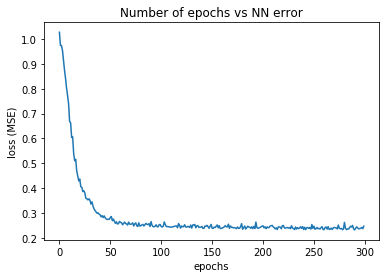

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss_b = np.array(hist.history['loss'])
epochs_b = np.arange(300)

plt.plot(epochs_b, loss_b)
plt.title("Number of epochs vs NN error")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()


<h3>Pregunta c</h3>
Se observa una curva mucho mas suave en el gráfico respecto a sigmoid, además se aprecia que al utilizar ReLU la convergencia es mucho más rápida que con sigmoid debido a que no tiene problemas con el gradiente descendiente, como si lo tiene sigmoid.

In [245]:
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 6s 16ms/step - loss: 0.9447 - val_loss: 0.9044
Epoch 2/300
379/379 [==============================] - 0s 112us/step - loss: 0.8211 - val_loss: 0.8163
Epoch 3/300
379/379 [==============================] - 0s 132us/step - loss: 0.7076 - val_loss: 0.7380
Epoch 4/300
379/379 [==============================] - 0s 106us/step - loss: 0.6036 - val_loss: 0.6729
Epoch 5/300
379/379 [==============================] - 0s 125us/step - loss: 0.5136 - val_loss: 0.6228
Epoch 6/300
379/379 [==============================] - 0s 107us/step - loss: 0.4423 - val_loss: 0.5857
Epoch 7/300
379/379 [==============================] - 0s 108us/step - loss: 0.3876 - val_loss: 0.5586
Epoch 8/300
379/379 [==============================] - 0s 130us/step - loss: 0.3468 - val_loss: 0.5351
Epoch 9/300
379/379 [==============================] - 0s 111us/step - loss: 0.3135 - val_loss: 0.5143
Epoch 10/300
379/379 [======

379/379 [==============================] - 0s 114us/step - loss: 0.1172 - val_loss: 0.2696
Epoch 80/300
379/379 [==============================] - 0s 118us/step - loss: 0.1160 - val_loss: 0.2698
Epoch 81/300
379/379 [==============================] - 0s 112us/step - loss: 0.1162 - val_loss: 0.2693
Epoch 82/300
379/379 [==============================] - 0s 123us/step - loss: 0.1153 - val_loss: 0.2683
Epoch 83/300
379/379 [==============================] - 0s 107us/step - loss: 0.1153 - val_loss: 0.2660
Epoch 84/300
379/379 [==============================] - 0s 114us/step - loss: 0.1149 - val_loss: 0.2668
Epoch 85/300
379/379 [==============================] - 0s 122us/step - loss: 0.1141 - val_loss: 0.2655
Epoch 86/300
379/379 [==============================] - 0s 116us/step - loss: 0.1138 - val_loss: 0.2657
Epoch 87/300
379/379 [==============================] - 0s 123us/step - loss: 0.1133 - val_loss: 0.2675
Epoch 88/300
379/379 [==============================] - 0s 108us/step - loss:

379/379 [==============================] - 0s 115us/step - loss: 0.0923 - val_loss: 0.2423
Epoch 158/300
379/379 [==============================] - 0s 113us/step - loss: 0.0912 - val_loss: 0.2415
Epoch 159/300
379/379 [==============================] - 0s 121us/step - loss: 0.0919 - val_loss: 0.2435
Epoch 160/300
379/379 [==============================] - 0s 109us/step - loss: 0.0915 - val_loss: 0.2405
Epoch 161/300
379/379 [==============================] - 0s 116us/step - loss: 0.0912 - val_loss: 0.2408
Epoch 162/300
379/379 [==============================] - 0s 117us/step - loss: 0.0909 - val_loss: 0.2403
Epoch 163/300
379/379 [==============================] - 0s 125us/step - loss: 0.0904 - val_loss: 0.2389
Epoch 164/300
379/379 [==============================] - 0s 123us/step - loss: 0.0904 - val_loss: 0.2412
Epoch 165/300
379/379 [==============================] - 0s 123us/step - loss: 0.0903 - val_loss: 0.2399
Epoch 166/300
379/379 [==============================] - 0s 111us/ste

379/379 [==============================] - 0s 115us/step - loss: 0.0780 - val_loss: 0.2270
Epoch 236/300
379/379 [==============================] - 0s 113us/step - loss: 0.0776 - val_loss: 0.2280
Epoch 237/300
379/379 [==============================] - 0s 116us/step - loss: 0.0778 - val_loss: 0.2303
Epoch 238/300
379/379 [==============================] - 0s 118us/step - loss: 0.0773 - val_loss: 0.2250
Epoch 239/300
379/379 [==============================] - 0s 128us/step - loss: 0.0776 - val_loss: 0.2248
Epoch 240/300
379/379 [==============================] - 0s 122us/step - loss: 0.0771 - val_loss: 0.2242
Epoch 241/300
379/379 [==============================] - 0s 121us/step - loss: 0.0771 - val_loss: 0.2226
Epoch 242/300
379/379 [==============================] - 0s 121us/step - loss: 0.0766 - val_loss: 0.2251
Epoch 243/300
379/379 [==============================] - 0s 125us/step - loss: 0.0768 - val_loss: 0.2253
Epoch 244/300
379/379 [==============================] - 0s 129us/ste

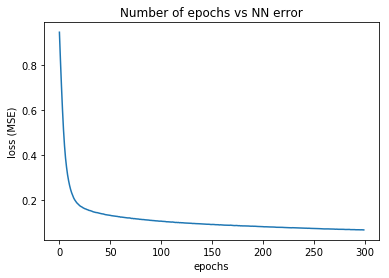

In [246]:
loss_b = np.array(hist.history['loss'])
epochs_b = np.arange(300)

plt.plot(epochs_b, loss_b)
plt.title("Number of epochs vs NN error")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()

<h3>Pregunta d</h3>
Se observa que en ambos casos el mejor learning rate es de 0.01, ambos parten muy mal (con el learning rate $10^{-4}$) ya que al cabo de 300 epochs aún no logran converger. Se sigue observando el fenómeno irregular presente en sigmoid, por otro lado ReLu es mucho mas suave y converge mucho mas rápido por lo descrito en la pregunta anterior.

In [261]:
n_lr = 10
lear_rate = np.linspace(0.0001,0.01,n_lr)


model = Sequential()

hists_sigm = []

for k in lear_rate:
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    # Cambiar learning rate
    sgd = SGD(lr=k)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    loss_b = np.array(hist.history['loss'])
    hists_sigm.append(loss_b)

    
hists_relu = []
activation = 'relu'
for l in lear_rate:
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    # Cambiar learning rate
    sgd = SGD(lr=l)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    loss_b = np.array(hist.history['loss'])
    hists_relu.append(loss_b)


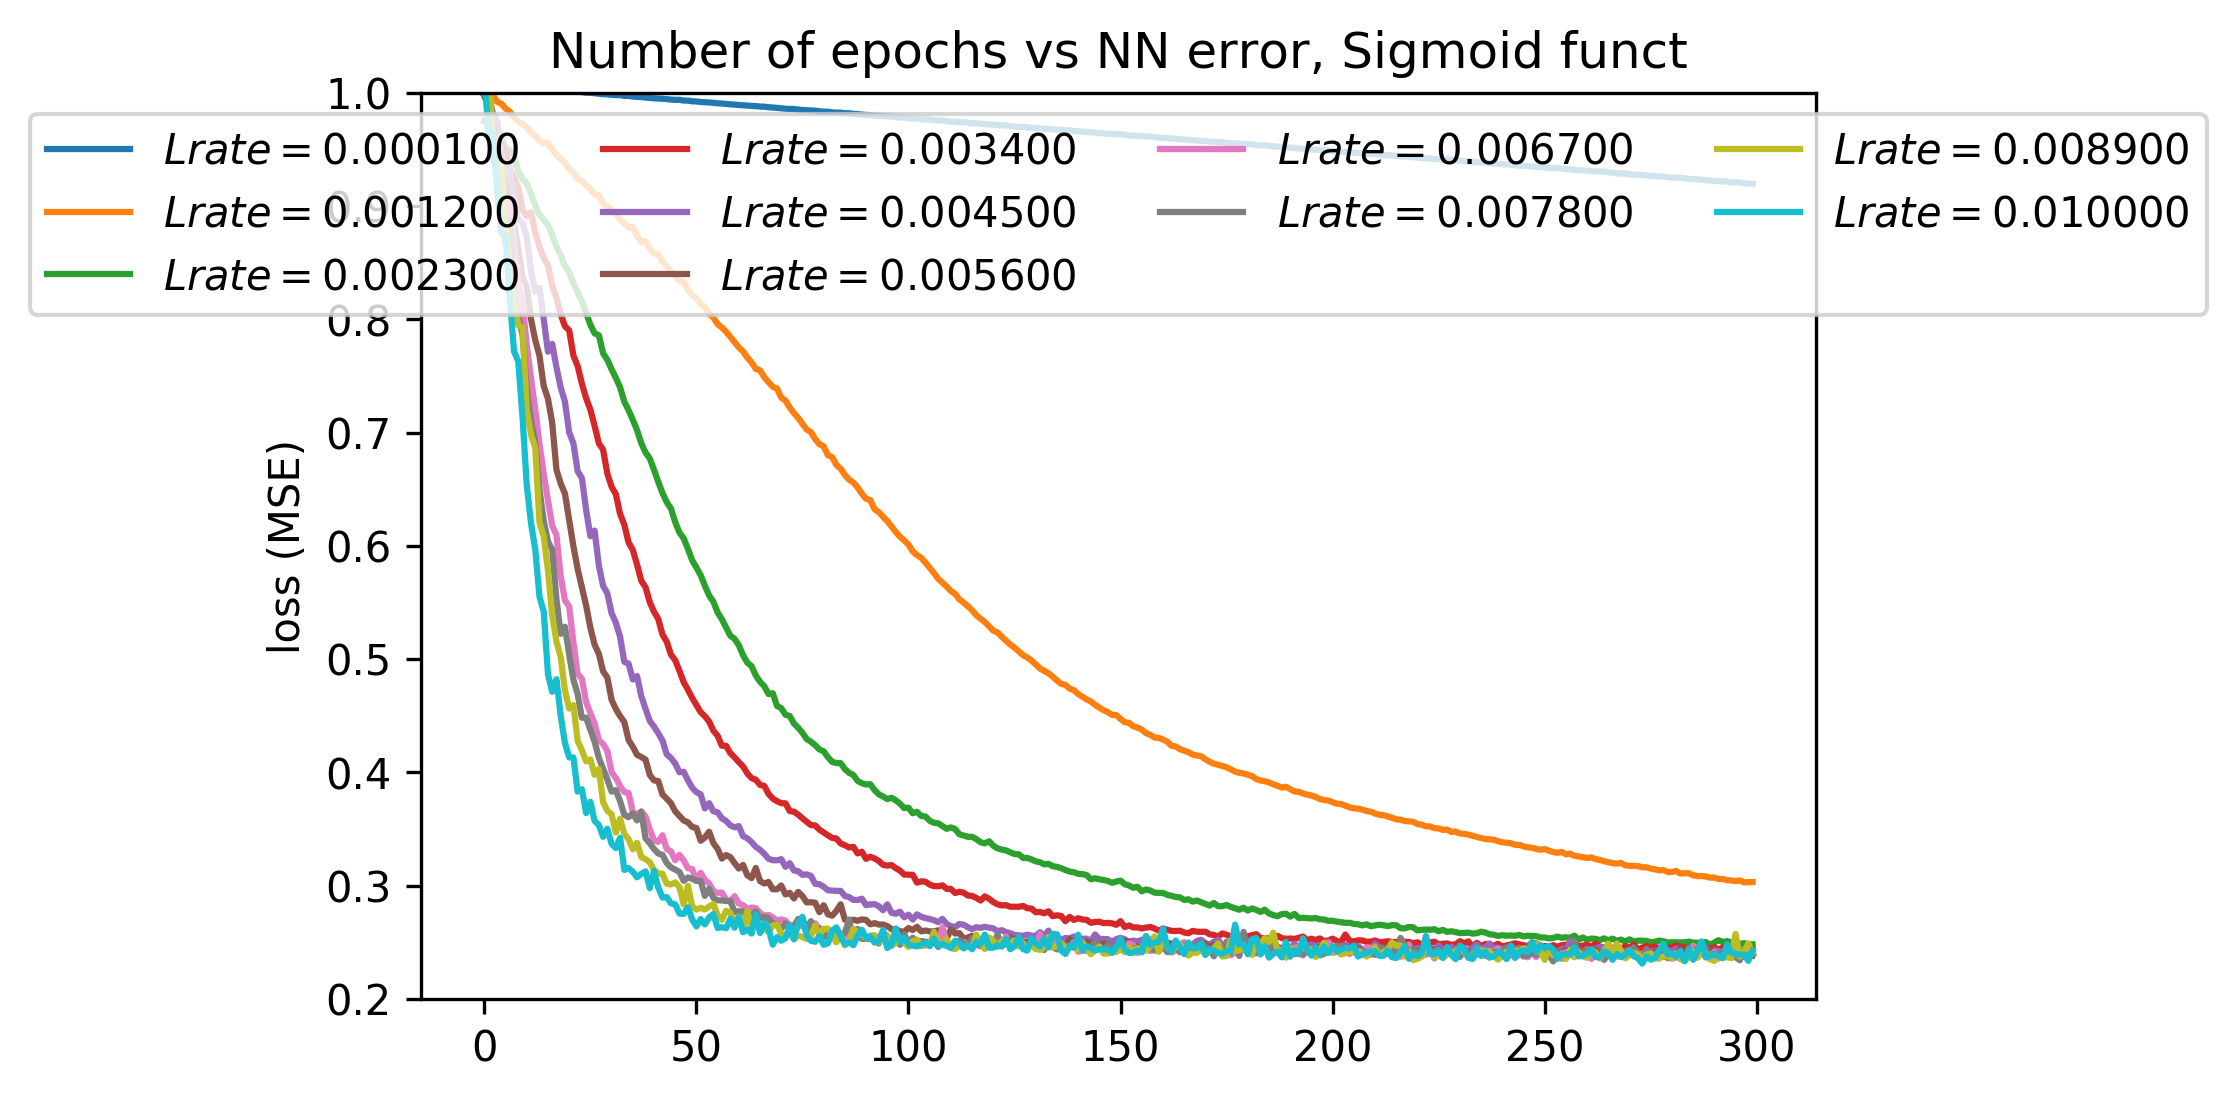

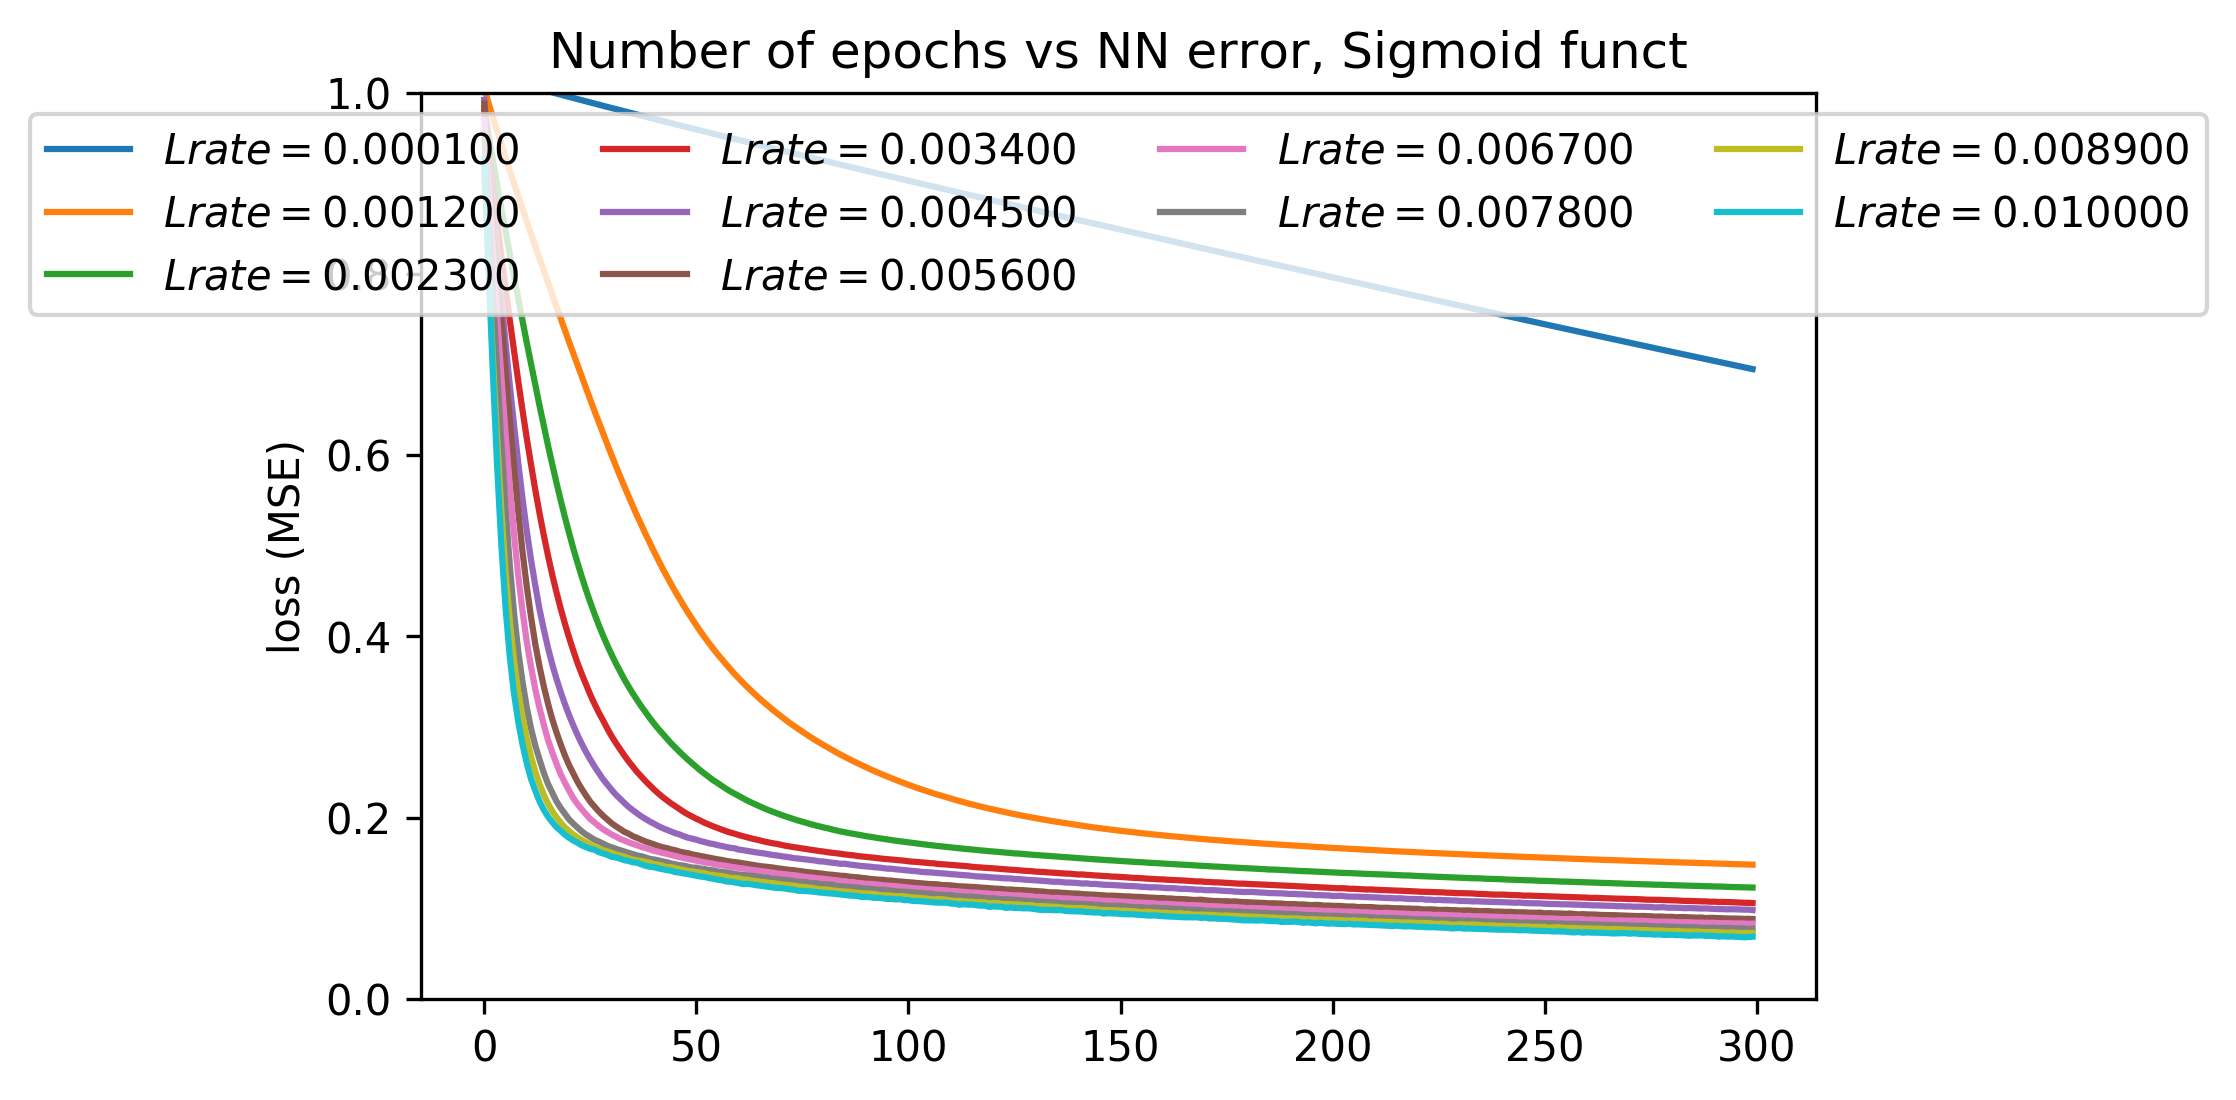

In [280]:


epochs_d = np.arange(300)


labels_sigm = []
index = 0
plt.figure(dpi=300)
for i in hists_sigm:
    plt.plot(epochs_d, np.array(i))
    labels_sigm.append(r'$Lrate = %f$' % (lear_rate[index]))
    index += 1
plt.legend(labels_sigm, ncol=4, loc='upper center')#, 
#           bbox_to_anchor=[0.5, 1.1], 
#           columnspacing=1.0, labelspacing=0.0,
#           handletextpad=0.0, handlelength=1.5,
#           fancybox=True, shadow=True)
plt.title('Number of epochs vs NN error, Sigmoid funct')
plt.ylabel('loss (MSE)')
plt.ylim((0.2,1))
#plt.figure(figsize=(10,10))
plt.show()



labels_relu = []
index = 0
plt.figure(dpi=300)
for i in hists_relu:
    plt.plot(epochs_d, np.array(i))
    labels_relu.append(r'$Lrate = %f$' % (lear_rate[index]))
    index += 1
plt.legend(labels_relu, ncol=4, loc='upper center')#, 
#           bbox_to_anchor=[0.5, 1.1], 
#           columnspacing=1.0, labelspacing=0.0,
#           handletextpad=0.0, handlelength=1.5,
#           fancybox=True, shadow=True)
plt.title('Number of epochs vs NN error, Sigmoid funct')
plt.ylabel('loss (MSE)')
plt.ylim((0,1))
#plt.figure(figsize=(10,10))
plt.show()


#plt.plot(epochs_d, loss_relu_1, epochs_d, loss_relu_2)
#plt.title('Number of epochs vs NN error, ReLU funct')
#plt.ylabel('loss (MSE)')
#plt.ylim((0,0.5))
#plt.show()


<h3>Pregunta e</h3>
Se observa que los errores iniciales con progresive decay son un poco mayores (sobre todo en sigmoid), sin embargo cuando se aplica esta técnica se observa que en el caso de sigmoid se converge más rapido con muchas perturbaciones. En el caso de ReLU se observa una convergencia muy suave.

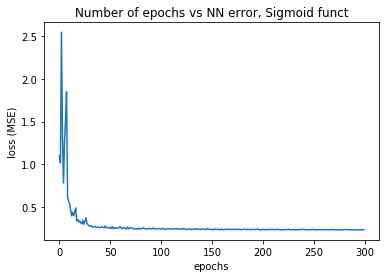

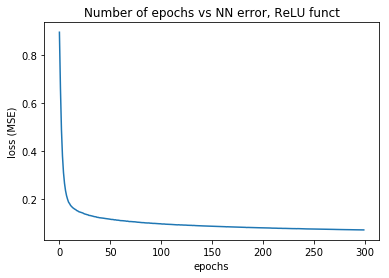

In [281]:
epochs_1 = np.arange(300)
# sigmoid
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.02, decay=1e-3)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

loss_e_sigm = np.array(hist.history['loss'])
plt.plot(epochs_1, loss_e_sigm)
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()

#ReLU
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.02, decay=1e-3)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

loss_e_relu = np.array(hist.history['loss'])
plt.plot(epochs_1, loss_e_relu)
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()

<h3>Pregunta f</h3>
En ambos casos se observa que al aumentar el tamaño del batch la convergencia tarda una mayor cantidad de epochs, esto se debe a que se realizan más actualizaciones al tener batchs pequeños.

In [283]:

n_batches = 10
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))

hists_sigm = []
hists_relu = []

for batch in np.int64(batch_sizes):
    # sigmoid
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

    loss_e_sigm = np.array(hist.history['loss'])
    hists_sigm.append(loss_e_sigm)

    #ReLU
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

    loss_e_relu = np.array(hist.history['loss'])
    hists_relu.append(loss_e_relu)

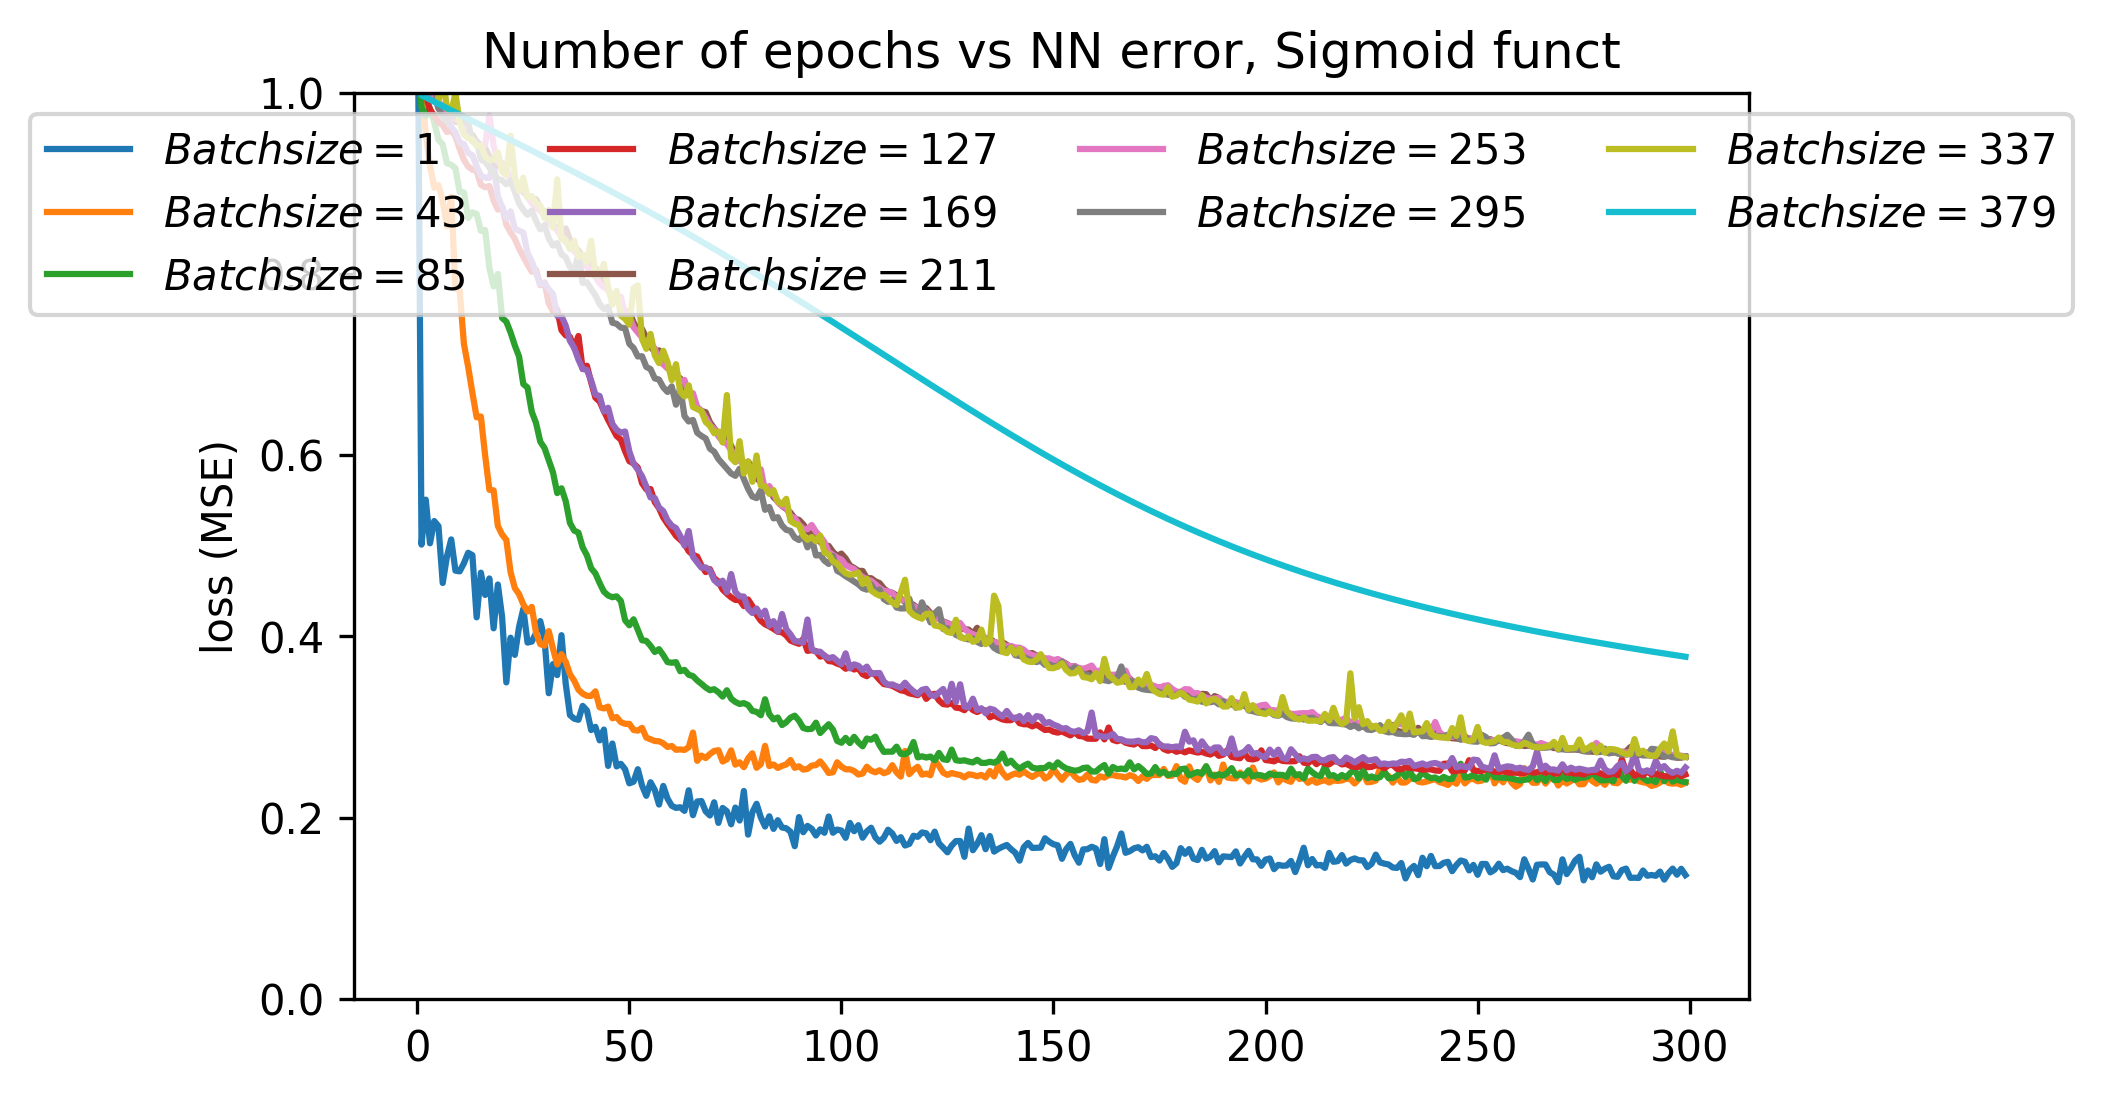

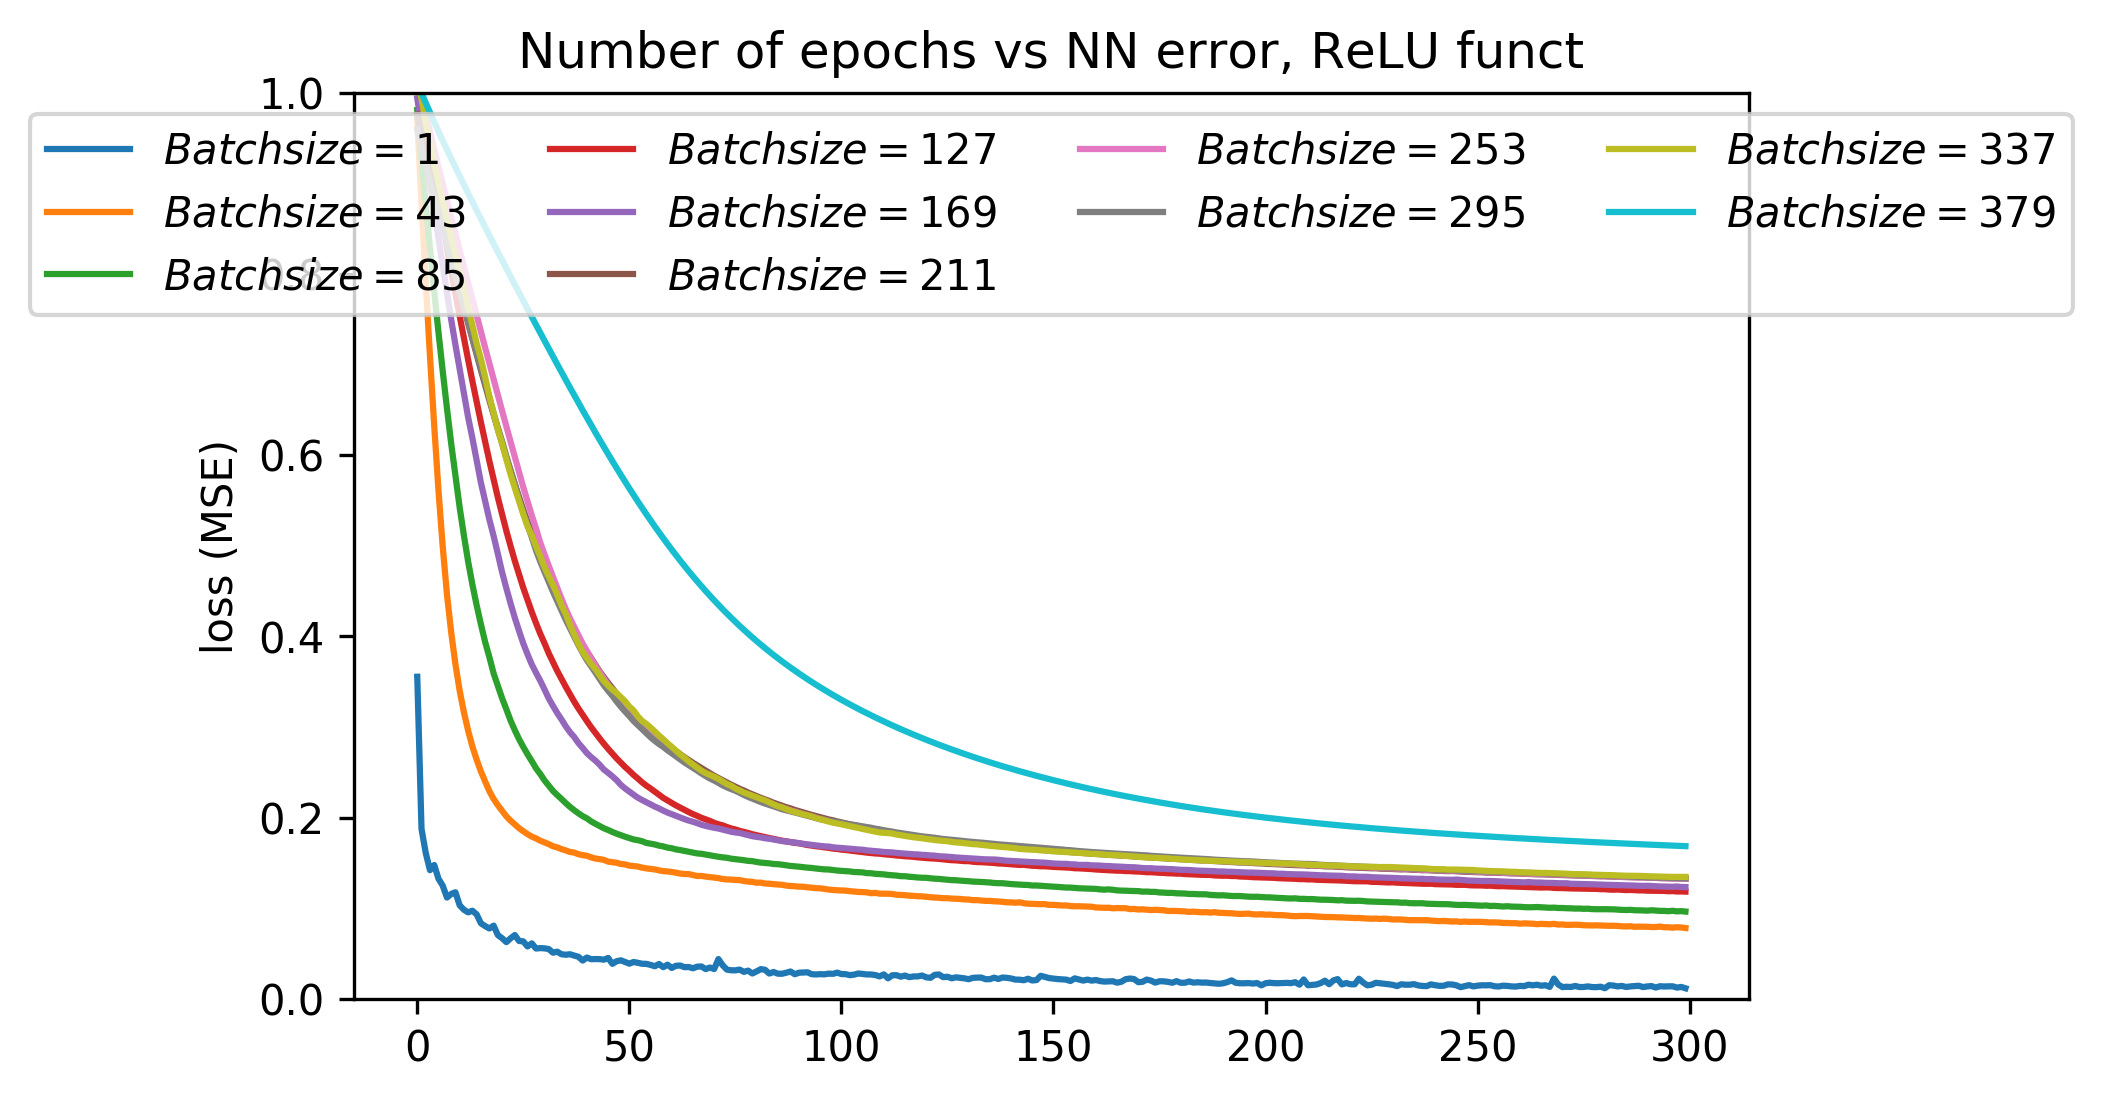

In [286]:
epochs_d = np.arange(300)


labels_sigm = []
index = 0
plt.figure(dpi=300)
for i in hists_sigm:
    plt.plot(epochs_d, np.array(i))
    labels_sigm.append(r'$Batch size = %i$' % (batch_sizes[index]))
    index += 1
plt.legend(labels_sigm, ncol=4, loc='upper center')#, 
#           bbox_to_anchor=[0.5, 1.1], 
#           columnspacing=1.0, labelspacing=0.0,
#           handletextpad=0.0, handlelength=1.5,
#           fancybox=True, shadow=True)
plt.title('Number of epochs vs NN error, Sigmoid funct')
plt.ylabel('loss (MSE)')
plt.ylim((0,1))
#plt.figure(figsize=(10,10))
plt.show()



labels_relu = []
index = 0
plt.figure(dpi=300)
for i in hists_relu:
    plt.plot(epochs_d, np.array(i))
    labels_relu.append(r'$Batch size = %i$' % (batch_sizes[index]))
    index += 1
plt.legend(labels_relu, ncol=4, loc='upper center')#, 
#           bbox_to_anchor=[0.5, 1.1], 
#           columnspacing=1.0, labelspacing=0.0,
#           handletextpad=0.0, handlelength=1.5,
#           fancybox=True, shadow=True)
plt.title('Number of epochs vs NN error, ReLU funct')
plt.ylabel('loss (MSE)')
plt.ylim((0,1))
#plt.figure(figsize=(10,10))
plt.show()













<h3>Pregunta g</h3>
Al ver los gráficos se observa inmediatamente que Adadelta es el que peor desempeño tiene, y que Adam es el mejor, también se aprecia que RMSprop es muy inestable. Adam es el que presenta mejores resultados con una convergencia con pocas fluctuaciones.

In [287]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
hists_sigmoid = []
# sigmoid --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
#adagrad
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_sigmoid.append(np.array(hist.history['loss']))
#adadelta
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_sigmoid.append(np.array(hist.history['loss']))
#RMSprop
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_sigmoid.append(np.array(hist.history['loss']))
#adam
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_sigmoid.append(np.array(hist.history['loss']))

#--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 

hists_relu = []
#ReLU --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
#adagrad
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_relu.append(np.array(hist.history['loss']))
#adadelta
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_relu.append(np.array(hist.history['loss']))
#RMSprop
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_relu.append(np.array(hist.history['loss']))
#adam
model.reset_states()
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
#sgd = SGD(lr=0.01)
moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
hists_relu.append(np.array(hist.history['loss']))
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

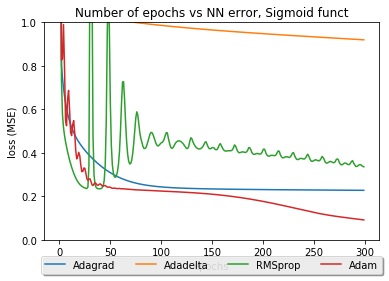

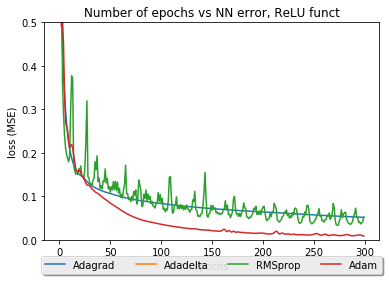

In [289]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "Adagrad")
ax.plot(epochs_1, hists_sigmoid[1], label = "Adadelta")
ax.plot(epochs_1, hists_sigmoid[2], label = "RMSprop")
ax.plot(epochs_1, hists_sigmoid[3], label = "Adam")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.ylim((0,1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "Adagrad")
ax.plot(epochs_1, hists_relu[1], label = "Adadelta")
ax.plot(epochs_1, hists_relu[2], label = "RMSprop")
ax.plot(epochs_1, hists_relu[3], label = "Adam")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.ylim((0,0.5))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

<h3>Pregunta h</h3>
Luego de realizar distintas variaciones se aprecia que para regularizadores de distinto orden de magnitud no existe una gran variacion al aplicarlos en capas únicas, sin embargo cuando se aplican los regularizadores l1 y l2 en distintas capas, en particular con valor 0.01 se observa un mejor desempeño respecto de los demás valores.

In [290]:
from keras import regularizers

hists_sigmoid = []
hists_relu = []

regularizers_values = [0.0001, 0.001, 0.01, 0.1]
for i in regularizers_values:
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',kernel_regularizer= regularizers.l2(i)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer= regularizers.l1(i)))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    hists_sigmoid.append(np.array(hist.history['loss']))
    
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',kernel_regularizer= regularizers.l2(i)))
    model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer= regularizers.l1(i)))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, batch_size=batch, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    hists_relu.append(np.array(hist.history['loss']))

Regularizador l2 en la primera capa


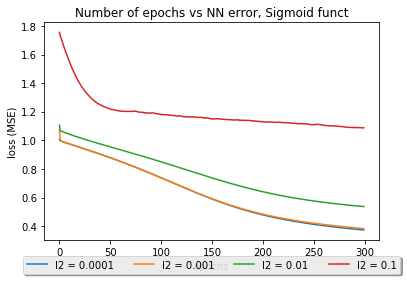

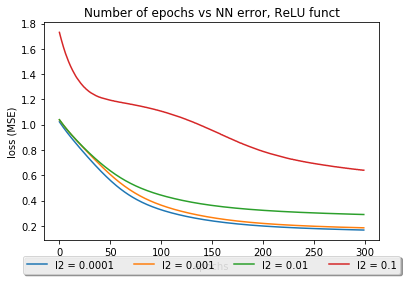

In [291]:
print("Regularizador l2 en la primera capa")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "l2 = 0.0001")
ax.plot(epochs_1, hists_sigmoid[1], label = "l2 = 0.001")
ax.plot(epochs_1, hists_sigmoid[2], label = "l2 = 0.01")
ax.plot(epochs_1, hists_sigmoid[3], label = "l2 = 0.1")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "l2 = 0.0001")
ax.plot(epochs_1, hists_relu[1], label = "l2 = 0.001")
ax.plot(epochs_1, hists_relu[2], label = "l2 = 0.01")
ax.plot(epochs_1, hists_relu[3], label = "l2 = 0.1")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

Regularizador l2 en la segunda capa


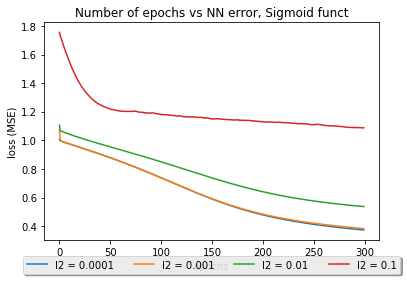

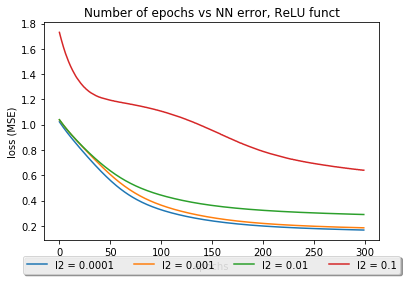

In [292]:
print("Regularizador l2 en la segunda capa")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "l2 = 0.0001")
ax.plot(epochs_1, hists_sigmoid[1], label = "l2 = 0.001")
ax.plot(epochs_1, hists_sigmoid[2], label = "l2 = 0.01")
ax.plot(epochs_1, hists_sigmoid[3], label = "l2 = 0.1")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "l2 = 0.0001")
ax.plot(epochs_1, hists_relu[1], label = "l2 = 0.001")
ax.plot(epochs_1, hists_relu[2], label = "l2 = 0.01")
ax.plot(epochs_1, hists_relu[3], label = "l2 = 0.1")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

Regularizador l2 en la primera capa y l1 en la segunda


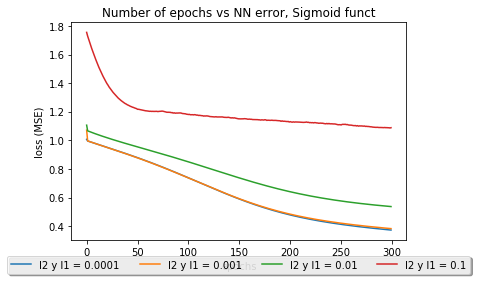

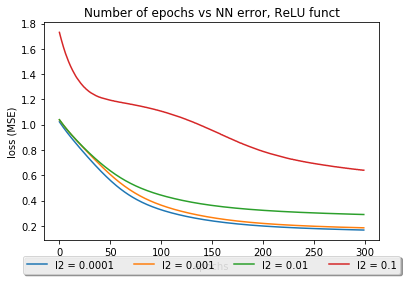

In [293]:
print("Regularizador l2 en la primera capa y l1 en la segunda")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "l2 y l1 = 0.0001")
ax.plot(epochs_1, hists_sigmoid[1], label = "l2 y l1 = 0.001")
ax.plot(epochs_1, hists_sigmoid[2], label = "l2 y l1 = 0.01")
ax.plot(epochs_1, hists_sigmoid[3], label = "l2 y l1 = 0.1")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "l2 = 0.0001")
ax.plot(epochs_1, hists_relu[1], label = "l2 = 0.001")
ax.plot(epochs_1, hists_relu[2], label = "l2 = 0.01")
ax.plot(epochs_1, hists_relu[3], label = "l2 = 0.1")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

<h3>Pregunta i</h3>
Se observa claramente lo que dice la teoría, dropout en general tiende a necesitar muchos mas epochs para converger a un valor de error aceptable, es decir aprende más lento pero mejor. En los gráficos se aprecia que mientras mayor es el valor de dropout más lento aprende la red.

In [294]:
from keras.layers import Dropout
hists_sigmoid = []
hists_relu = []

regularizers_values = [0.01,0.1,0.2,0.3]
for i in regularizers_values:
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(i))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    model.add(Dropout(i))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    hists_sigmoid.append(np.array(hist.history['loss']))
    
    model.reset_states()
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(i))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    model.add(Dropout(i))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
    hists_relu.append(np.array(hist.history['loss']))

Dropout en la primera capa


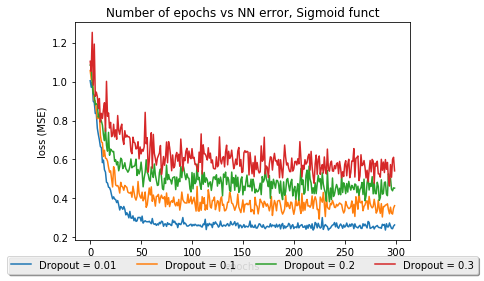

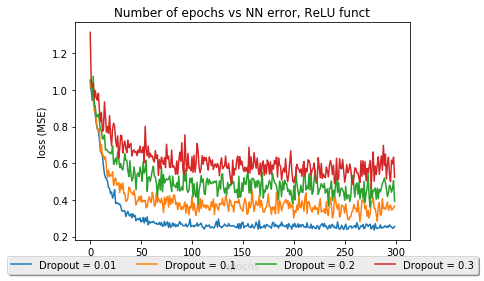

In [295]:
print("Dropout en la primera capa")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_sigmoid[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_sigmoid[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_sigmoid[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_relu[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_relu[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_relu[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

Dropout en la segunda capa


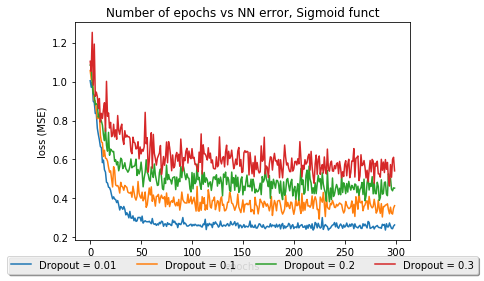

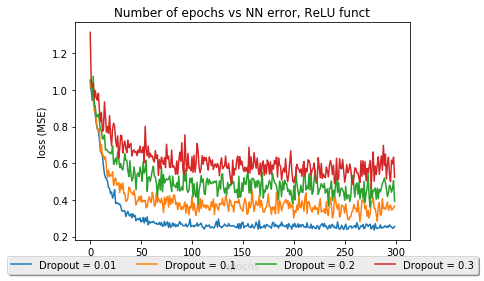

In [296]:
print("Dropout en la segunda capa")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_sigmoid[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_sigmoid[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_sigmoid[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_relu[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_relu[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_relu[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

Dropout en la primera y segunda capa


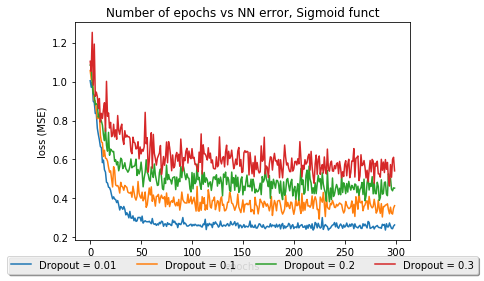

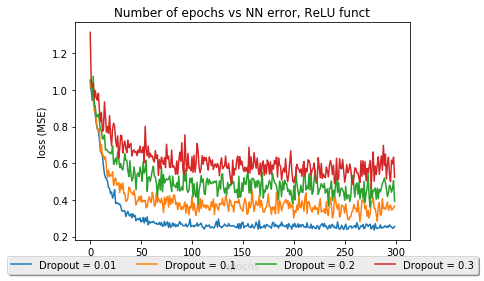

In [297]:
print("Dropout en la primera y segunda capa")
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_sigmoid[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_sigmoid[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_sigmoid[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_sigmoid[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, Sigmoid funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epochs_1, hists_relu[0], label = "Dropout = 0.01")
ax.plot(epochs_1, hists_relu[1], label = "Dropout = 0.1")
ax.plot(epochs_1, hists_relu[2], label = "Dropout = 0.2")
ax.plot(epochs_1, hists_relu[3], label = "Dropout = 0.3")
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

In [ ]:
<h3>Pregunta j</h3>


In [ ]:
from sklearn import cross_validation
from keras.layers import Dropout
from keras import regularizers


Xm = X_train_scaled.as_matrix()
ym = y_train
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []

for i, (train, val) in enumerate(kfold):
    # create model
    #model.reset_states()
    model = Sequential()
    
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', kernel_regularizer= regularizers.l2(0.1)))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1000, kernel_initializer='uniform',kernel_regularizer= regularizers.l2(0.1)))
    model.add(Activation('relu'))
    #model.add(Dropout(0.35))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    moptimizer = SGD(lr=0.001, decay = 1e-4)
    #moptimizer = RMSprop(lr=0.1)
    model.compile(optimizer=moptimizer,loss='mean_squared_error', metrics=['accuracy'])
    # Fit the model
    model.fit(Xm[train], ym[train], epochs=300, batch_size=50, verbose =0)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val], verbose = 0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores)
mse_cv = np.mean(cvscores)

## 2.- Deep Networks


<h3>Pregunta a y b </h3>
Se observa claramente que los pesos antes de ser entrenados presentan valores muy dispersos dentro del rango de normalización, lo cual cambia una vez entrenados a una distribución uniforme.

In [321]:

import keras as keras
from keras import backend as K
import tensorflow as tf


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]


###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]

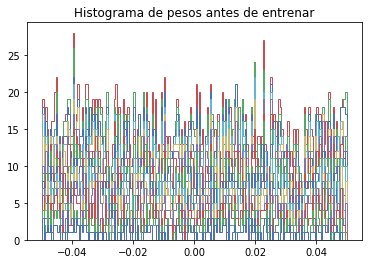

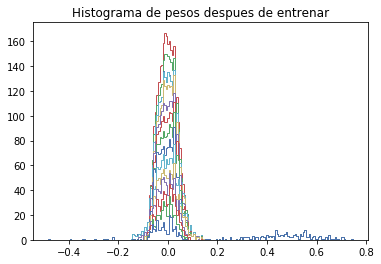

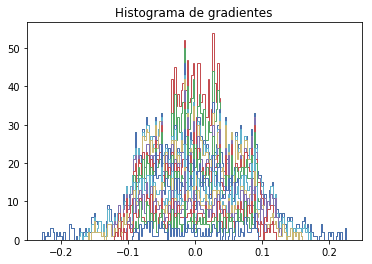

In [389]:
plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos antes de entrenar')
plt.show()

plt.hist([r for r in first_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos despues de entrenar')
plt.show()

plt.hist([r for r in evaluated_gradients[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes')
plt.show()




<h3>Pregunta c</h3>
Se observa claramente el problema del gradiente desvaneciente despues de entrenar ya que el histograma muestra claramente valores extremadamente cercanos a 0, por lo que el avance hacia el óptimo es mínimo, lo que haría que la red se estanque y no avance.

In [390]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

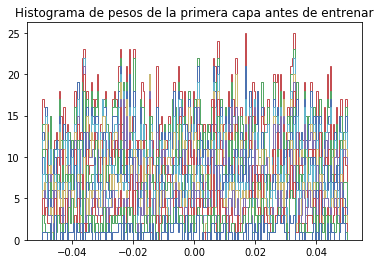

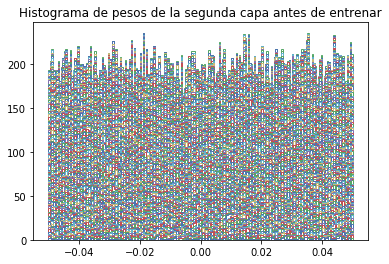

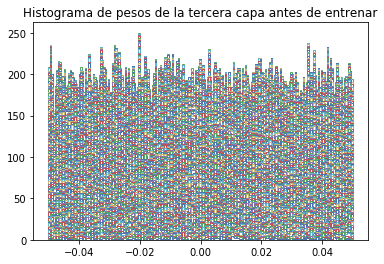

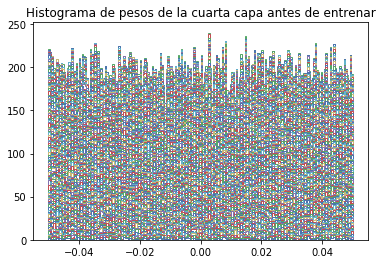

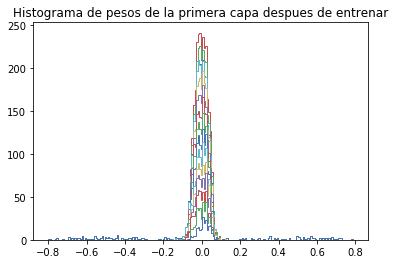

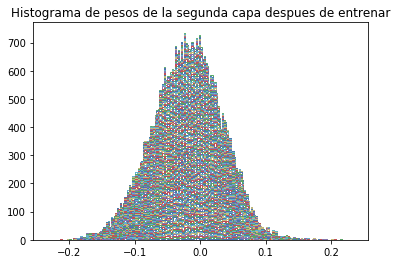

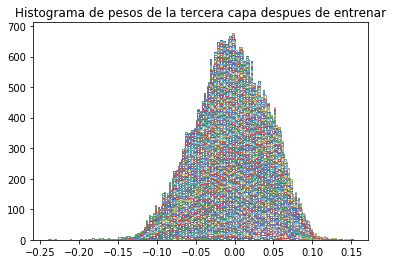

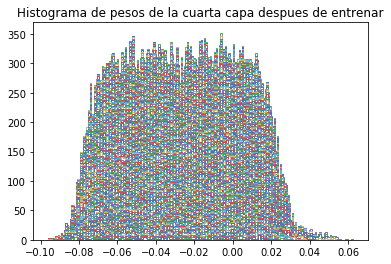

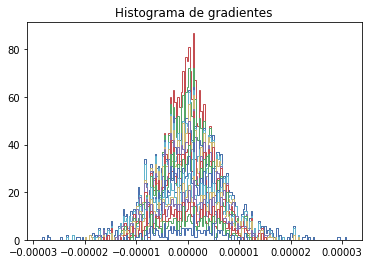

In [392]:
plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in first_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in evaluated_gradients[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes')
plt.show()


<h3>Pregunta d</h3>
Se observa un fenómeno parecido al que se aprecia con una distribución uniforme, sin embargo el fenómeno del gradiente desvaneciente se atenúa en 2 ordenes de magnitud, por lo que el objetivo se cumple.

In [393]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157540). Check your callbacks.
  % delta_t_median)


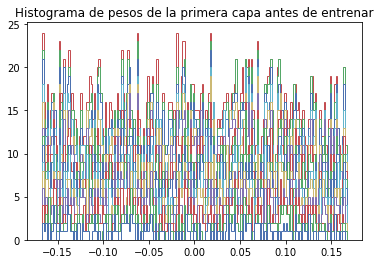

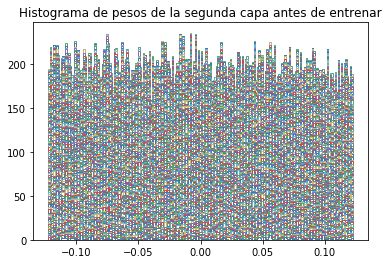

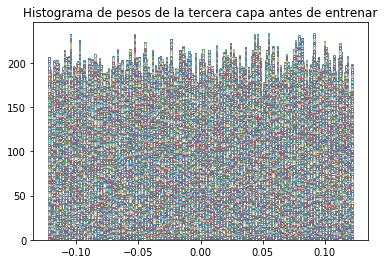

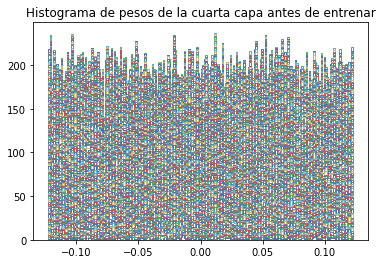

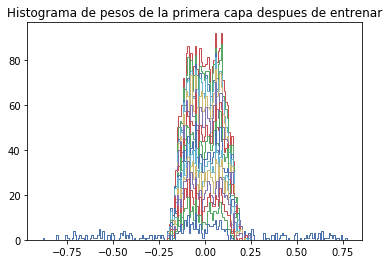

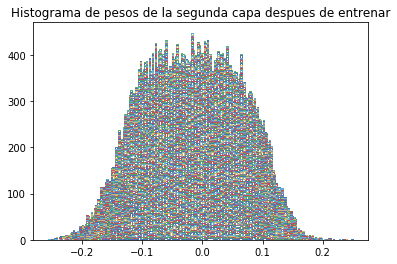

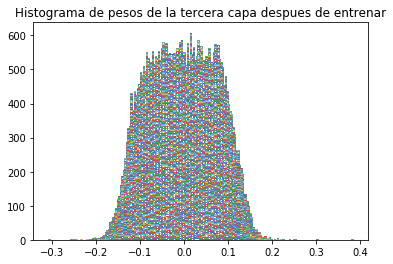

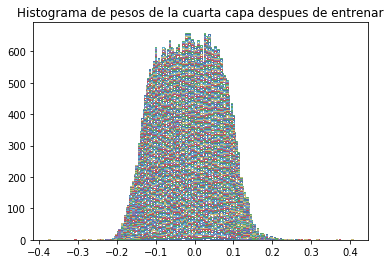

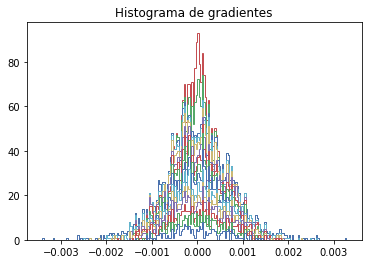

In [394]:
plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in first_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in evaluated_gradients[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes')
plt.show()

<h3>Pregunta e</h3>
Se observa que el desvanecimiento del gradiente no es un gran problema al usar ReLU como función de activación debido a que la derivada siempre es constante, al contrario de sigmoid que al acercarse a los límites la derivada es muy pequeña. Se observa una mejora importante al distribuir uniformemente los pesos iniciales, sin embargo al usar la distribución de glorot se obtienen (después de entrenar) pesos y gradientes nan, por lo que se concluye que ReLU presenta mejores rendimientos si no se combina con glorot. Por último para la inicialización He se obtienen resultados similares a glorot, ya que los gradientes después de entrenar también son valores nan.

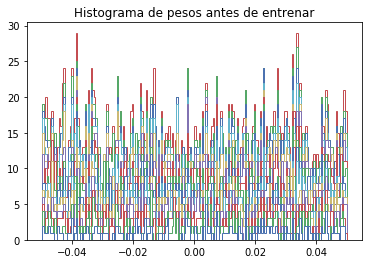

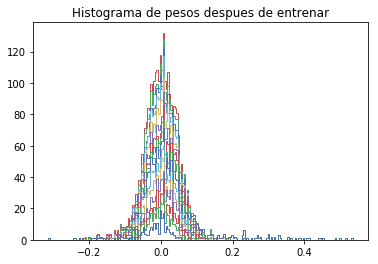

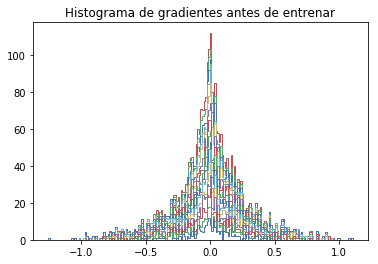

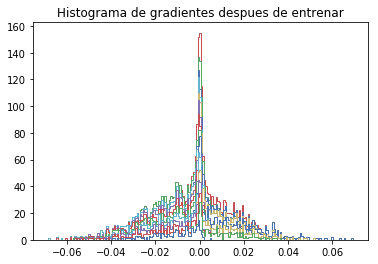

In [395]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]


###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_before = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train) for gradient in evaluated_gradients_before]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_after = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_after = [gradient/len(y_train) for gradient in evaluated_gradients_after]

plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos antes de entrenar')
plt.show()

plt.hist([r for r in first_layer_weights_after], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos despues de entrenar')
plt.show()

plt.hist([r for r in evaluated_gradients_before[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes antes de entrenar')
plt.show()

plt.hist([r for r in evaluated_gradients_after[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes despues de entrenar')
plt.show()

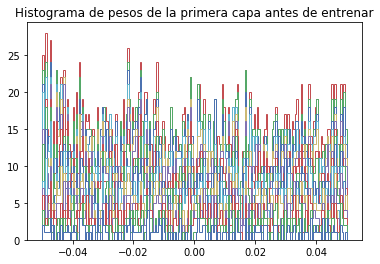

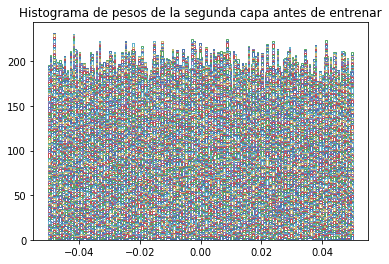

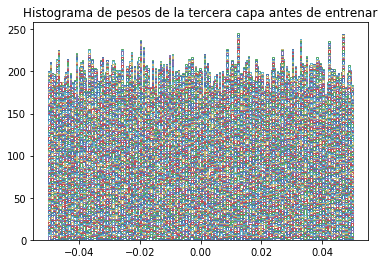

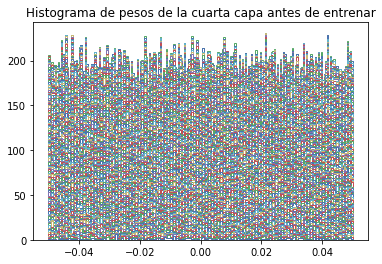

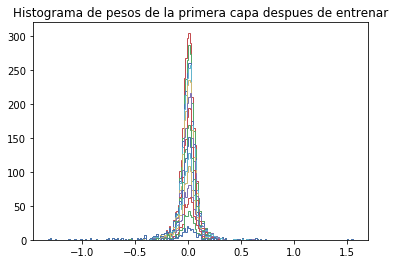

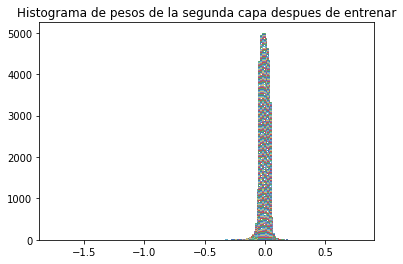

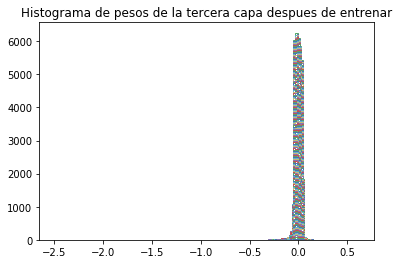

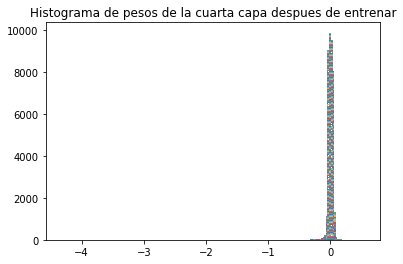

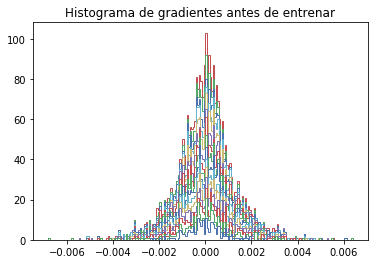

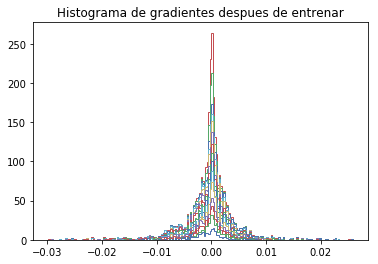

In [403]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_before = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train) for gradient in evaluated_gradients_before]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_after = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_after = [gradient/len(y_train) for gradient in evaluated_gradients_after]

plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in np.nan_to_num(first_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(second_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(third_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(fourth_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in evaluated_gradients_before[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes antes de entrenar')
plt.show()
plt.hist([r for r in evaluated_gradients_after[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes despues de entrenar')
plt.show()

In [402]:
np.isnan(first_layer_weights_after).any()

False

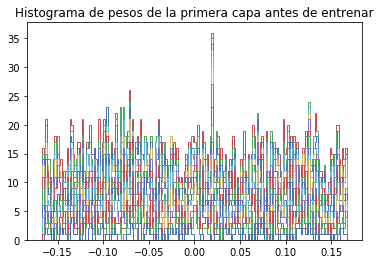

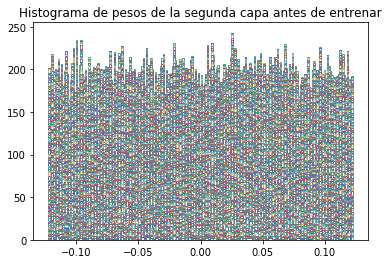

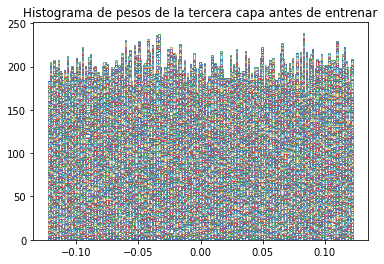

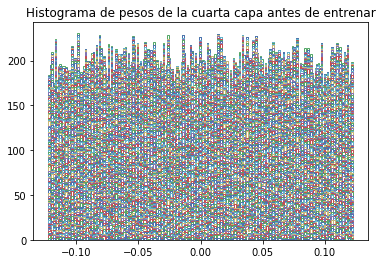

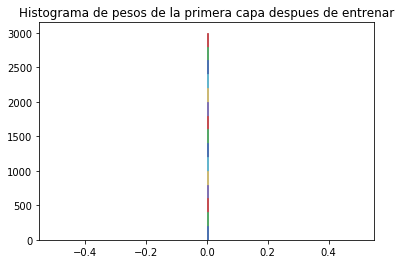

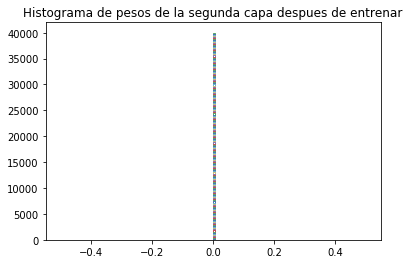

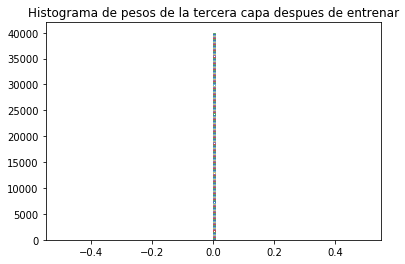

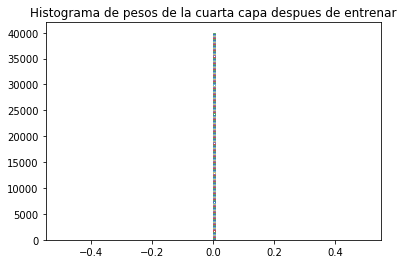

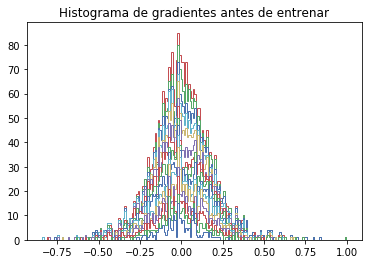

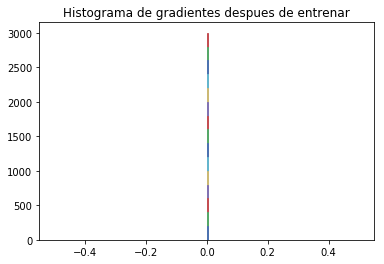

In [415]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_before = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train) for gradient in evaluated_gradients_before]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_after = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_ater = [gradient/len(y_train) for gradient in evaluated_gradients_after]

plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in np.nan_to_num(first_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(second_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(third_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(fourth_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in np.nan_to_num(evaluated_gradients_before[0])], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes antes de entrenar')
plt.show()
plt.hist([r for r in np.nan_to_num(evaluated_gradients_after[0])], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes despues de entrenar')
plt.show()

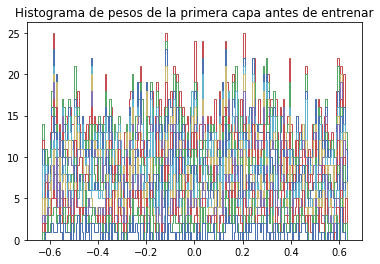

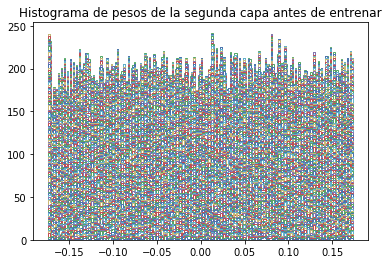

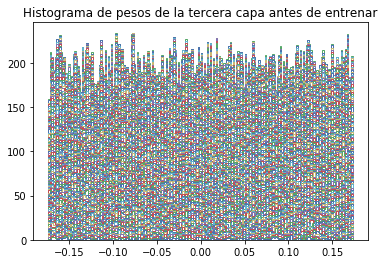

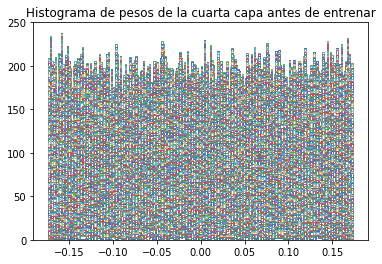

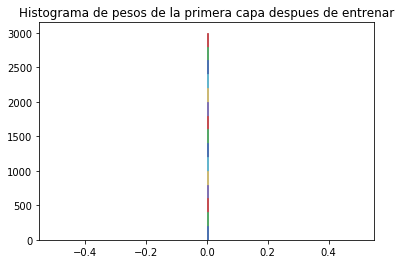

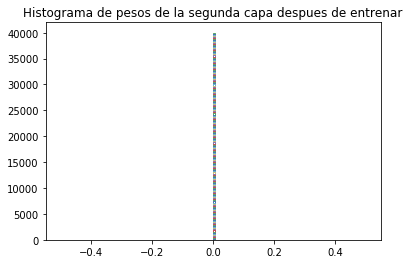

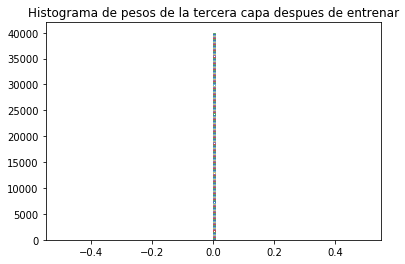

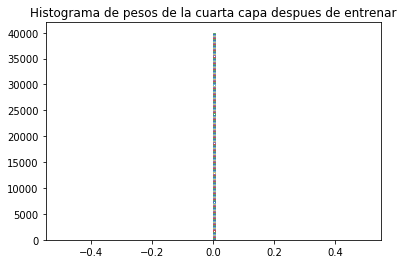

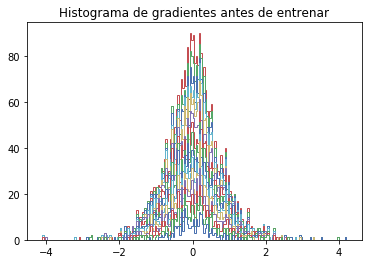

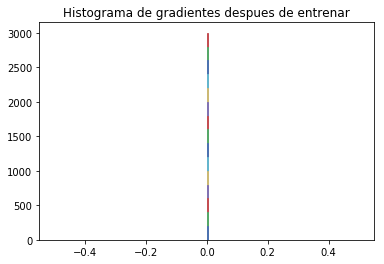

In [420]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_before = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train) for gradient in evaluated_gradients_before]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_after = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_after = [gradient/len(y_train) for gradient in evaluated_gradients_after]

plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in np.nan_to_num(first_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(second_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(third_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(fourth_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in evaluated_gradients_before[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes antes de entrenar')
plt.show()
plt.hist([r for r in np.nan_to_num(evaluated_gradients_after[0])], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes despues de entrenar')
plt.show()

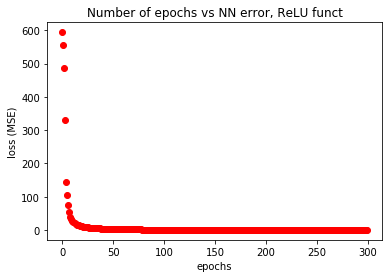

In [421]:
loss_he_relu = np.array(hist.history['loss'])
plt.plot(np.arange(300), loss_e_relu, 'ro')
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()

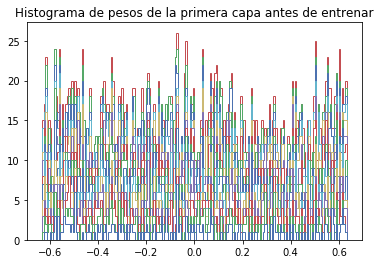

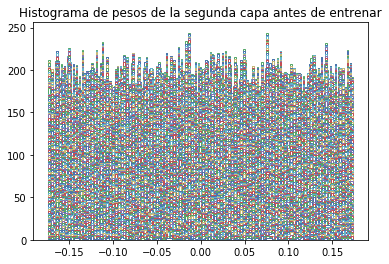

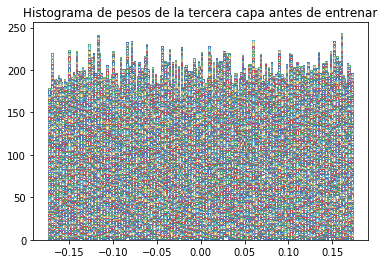

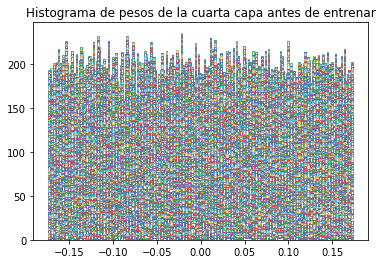

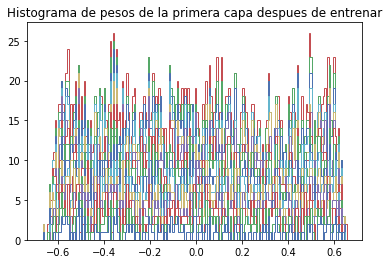

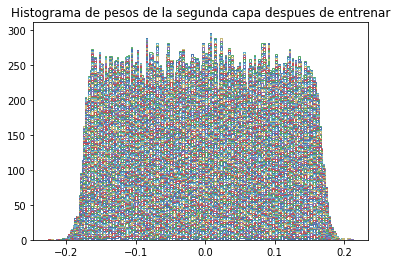

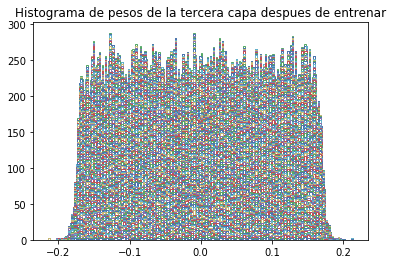

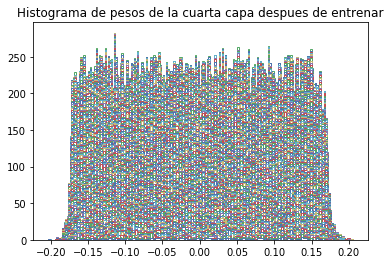

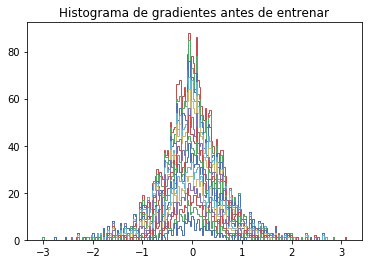

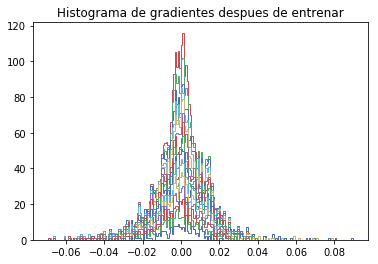

In [422]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd,loss='mean_squared_error')

#before training
first_layer_weights_before = model.layers[0].get_weights()[0]
second_layer_weights_before = model.layers[1].get_weights()[0]
third_layer_weights_before = model.layers[2].get_weights()[0]
fourth_layer_weights_before = model.layers[3].get_weights()[0]

###calculate gradients

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_before = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train) for gradient in evaluated_gradients_before]

#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))#, callbacks= [tbCallBack])
#after training
first_layer_weights_after = model.layers[0].get_weights()[0]
second_layer_weights_after = model.layers[1].get_weights()[0]
third_layer_weights_after = model.layers[2].get_weights()[0]
fourth_layer_weights_after = model.layers[3].get_weights()[0]

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_after = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_after = [gradient/len(y_train) for gradient in evaluated_gradients_after]

plt.hist([r for r in first_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa antes de entrenar')
plt.show()

plt.hist([r for r in second_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa antes de entrenar')
plt.show()

plt.hist([r for r in third_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa antes de entrenar')
plt.show()

plt.hist([r for r in fourth_layer_weights_before], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa antes de entrenar')
plt.show()



plt.hist([r for r in np.nan_to_num(first_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la primera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(second_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la segunda capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(third_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la tercera capa despues de entrenar')
plt.show()

plt.hist([r for r in np.nan_to_num(fourth_layer_weights_after)], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de pesos de la cuarta capa despues de entrenar')
plt.show()



plt.hist([r for r in evaluated_gradients_before[0]], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes antes de entrenar')
plt.show()
plt.hist([r for r in np.nan_to_num(evaluated_gradients_after[0])], bins = 200 , histtype='step', stacked=True, fill=False)
plt.title('Histograma de gradientes despues de entrenar')
plt.show()

Basta con cambiar el learning rate de 0.01 a 0.001 para observar que inmediatamente los pesos y gradientes después de entrenar la red ya dejan de ser valores nan, sin embargo los gradientes bajan 2 ordenes de magnitud por lo que se cree que el problema del gradiente desvaneciente estará presente si la red se sigue entrenando debido a que los pesos no llegan a distribuirse aún como se espera.

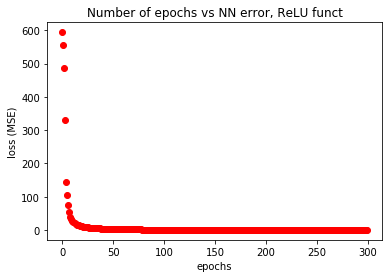

In [424]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

loss_glorot_sigmoid = np.array(hist.history['loss'])
plt.plot(np.arange(300), loss_e_relu, 'ro')
plt.title("Number of epochs vs NN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (MSE)')
plt.show()

## 3.- Convolutional Neural Network (CNN) en CIFAR

<h3>Pregunta a, b</h3>


In [38]:
from sklearn.cross_validation import train_test_split
from keras.datasets import cifar10
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Split train data set (50000) into train (49000) and validation (1000)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.02, random_state=1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

Modelo

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_22 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
__________

<h3>Pregunta c</h3>

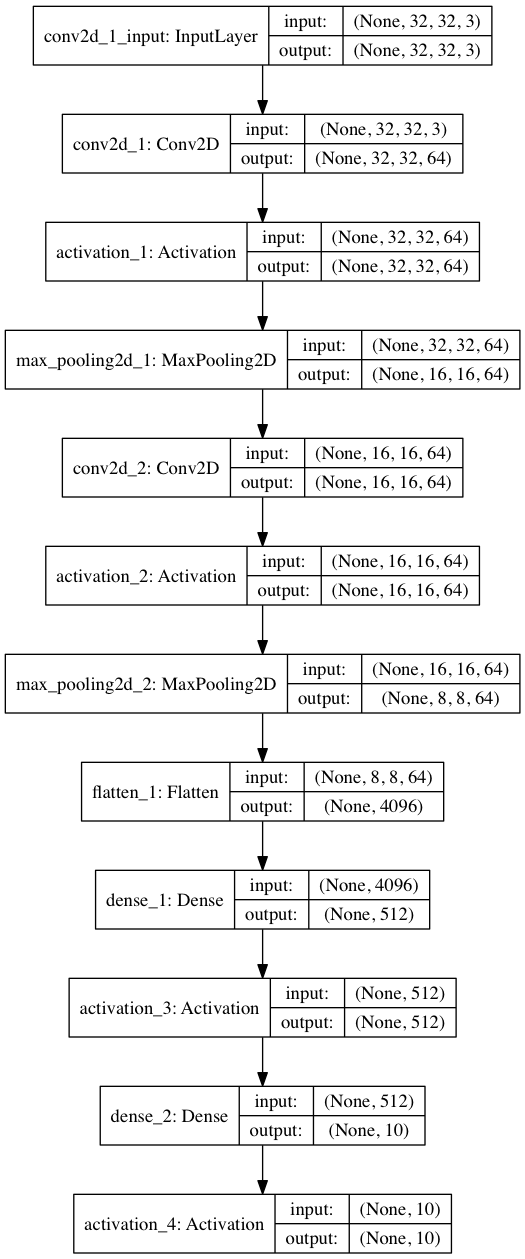

In [14]:
from IPython.display import Image
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

<h3>Pregunta d</h3>

In [43]:
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

opt = SGD(lr=0.001, momentum=0.9, decay=1e-6)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True, callbacks=[lrate])
print("Done!")

Done!


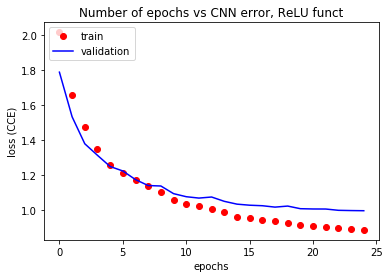

Test data set loss: 1.0403008580207824	 acc: 63.700000047683716%


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline 

score = model.evaluate(x_val,y_val,batch_size = 50,verbose =0)

loss_training_d = np.array(history.history['loss'])
loss_val_d = np.array(history.history['val_loss'])

plt.plot(np.arange(25), loss_training_d, 'ro')
plt.plot(np.arange(25), loss_val_d, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

<h3>Pregunta e</h3>

In [71]:
from keras.optimizers import SGD, rmsprop

def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

opt = rmsprop(lr=0.001, decay=1e-6)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True)
print("Done!")

Done!


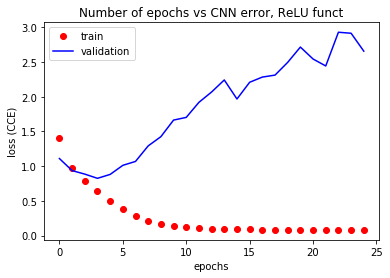

Test data set loss: 2.679691505432129	 acc: 73.20000052452087%


In [73]:
score = model.evaluate(x_val,y_val,batch_size = 50,verbose =0)

loss_training_e = np.array(history.history['loss'])
loss_val_e = np.array(history.history['val_loss'])

plt.plot(np.arange(25), loss_training_e, 'ro')
plt.plot(np.arange(25), loss_val_e, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

<h3>Pregunta f</h3>
A partir de este punto, y solo para la pregunta 3, se utilizó el ambiente jupyter notebook dispuesto por google para educación *google colab*, por lo que los resultados se mostrarán con fotos, sin embargo los resultados son obtenidos a partir del código que se muestra en este notebook.

In [ ]:
#Shallow network
nc = 5 #convolutional filter size
model = Sequential()
model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
from keras.optimizers import SGD, rmsprop

opt = rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True)
print("Done!")

In [ ]:
score = model.evaluate(x_val,y_val,batch_size = 50,verbose =0)

loss_training_e = np.array(history.history['loss'])
loss_val_e = np.array(history.history['val_loss'])

plt.plot(np.arange(25), loss_training_e, 'ro')
plt.plot(np.arange(25), loss_val_e, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

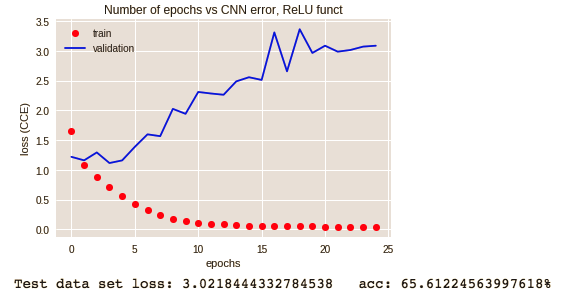

In [225]:
#importar foto de resultados
from IPython.display import Image
from keras.utils import plot_model
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("pregunta f.png")

<h3>Pregunta g</h3>
Usualmente el tamaño de los filtros dependerá de los inputs que tenga la red, si se quieren reconocer patrones de gran tamaño los filtros deben ser mas grandies, y por el contrario para patrones en zonas más pequeñas del input se debe establecer filtros mas pequeños. Probablemente sea una buena idea tomar filtros mas pequeños en la segunda capa de modo que no se pierda mucha dimensionalidad.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True)
print("Done!")

In [ ]:
score = model.evaluate(x_val,y_val,batch_size = 50,verbose =0)

loss_training_e = np.array(history.history['loss'])
loss_val_e = np.array(history.history['val_loss'])

plt.plot(np.arange(25), loss_training_e, 'ro')
plt.plot(np.arange(25), loss_val_e, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

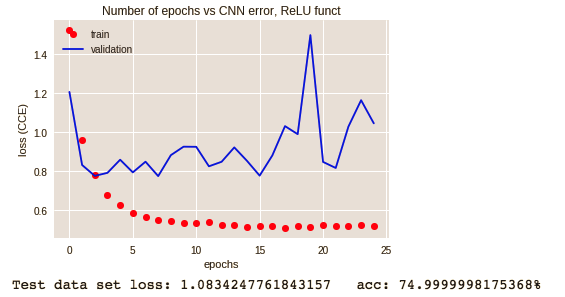

In [226]:
Image("pregunta g.png")

<h3>Pregunta h</h3>

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

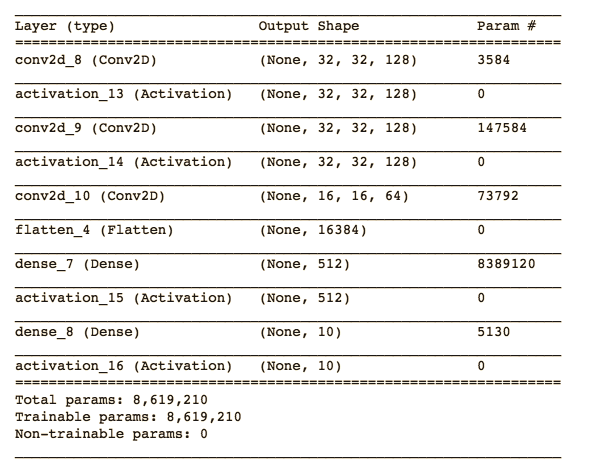

In [227]:
#foto
Image("pregunta h.png")

In [ ]:
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True)
print("Done!")

In [ ]:
score = model.evaluate(x_val,y_val,batch_size = 50,verbose =0)

loss_training_e = np.array(history.history['loss'])
loss_val_e = np.array(history.history['val_loss'])

plt.plot(np.arange(25), loss_training_e, 'ro')
plt.plot(np.arange(25), loss_val_e, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

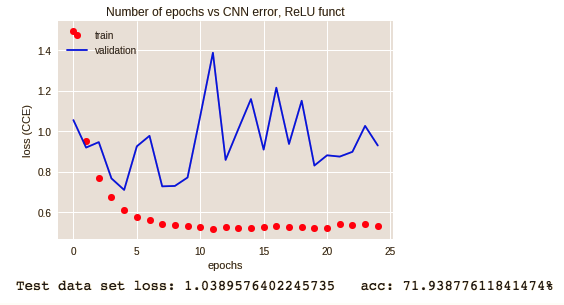

In [228]:
#foto
Image("pregunta h2.png")

<h3>Pregunta i</h3>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))

<h3>Pregunta j</h3>
En la tabla se muestra todos los outputs que la red clasificó de mala manera. En general no existe un patrón de confusión, ya que por ejemplo la clase avión se confunde con todas las demás.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=50,epochs=25, verbose =0,
          validation_data=(x_test,y_test), shuffle=True)
print("Done!")

In [ ]:
def n_largest_setarr(a, n=1):
    # a : Input array
    # n : We want n-max element position to be set to 1
    out = np.zeros_like(a)
    out[np.arange(len(a)), np.argpartition(a,-n, axis=1)[:,-n]] = 1
    return out
predicted = n_largest_setarr(model.predict(x_val))

result = np.absolute(y_val-predicted)

#imagenes mal clasificadas
wrongs_classes = []
for i in range(len(result)):
    if sum(result[i])!= 0:
        wrongs_classes.append(result[i])

    
wrong_classes_T = np.transpose(wrongs_classes)
df = pd.DataFrame({'airplane': wrong_classes_T[0].ravel(), 'automobile': wrong_classes_T[1].ravel(), 'bird': wrong_classes_T[2].ravel(),
      'cat': wrong_classes_T[3].ravel(), 'deer': wrong_classes_T[4].ravel(), 'dog': wrong_classes_T[5].ravel(),
            'frog': wrong_classes_T[6].ravel(), 'horse': wrong_classes_T[7].ravel(), 'ship': wrong_classes_T[8].ravel(),
                  'truck': wrong_classes_T[9].ravel()})

df_wo_dupes = df.drop_duplicates()


print (df_wo_dupes)

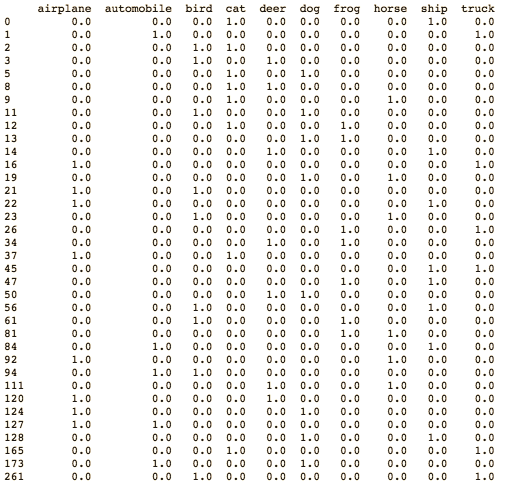

In [229]:
#foto
Image("pregunta j.png")

<h3>Pregunta k</h3>
Para esta pregunta se utilizó el mismo modelo que en la anterior, el cual presenta un acc aceptable, mas no óptimo. En general se observa una mejora en los pesos de los filtros en la capa 4 respecto de la 1, por lo que se intuye que la red se ha entrenado de manera aceptable, probablemente para obtener mejores resultados hhubiese sido conveniente utilizar estrategias de inicialización de pesos acordes al problema.

In [ ]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab as pl

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    # print(imshape)
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

In [ ]:
# first conv layer
W=  model.get_weights()[0][:, :, 0, :].transpose((2, 1, 0))


pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 8, 8), cmap=cm.binary)

#fourth conv layer
W=  model.get_weights()[6][:, :, 0, :].transpose((2, 1, 0))

pl.figure(figsize=(15, 15))
pl.title('conv4 weights')
nice_imshow(pl.gca(), make_mosaic(W, 13, 10), cmap=cm.binary)

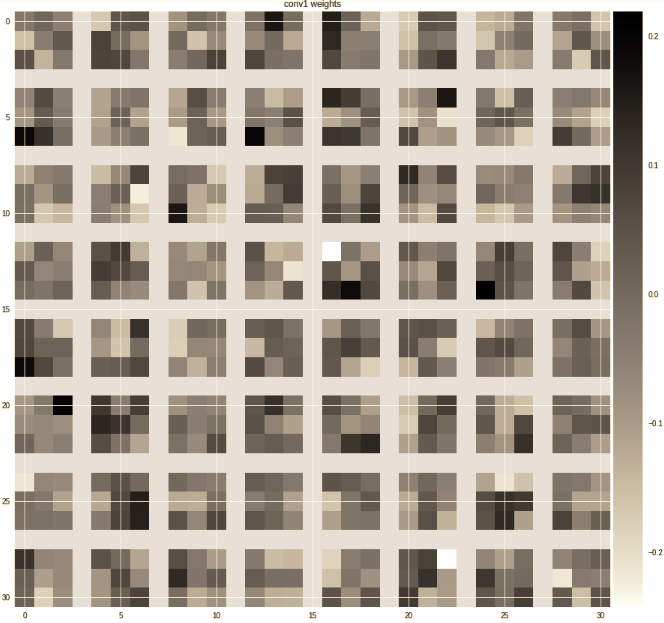

In [232]:
#fotos mosaicos
Image("pregunta k conv1.png")

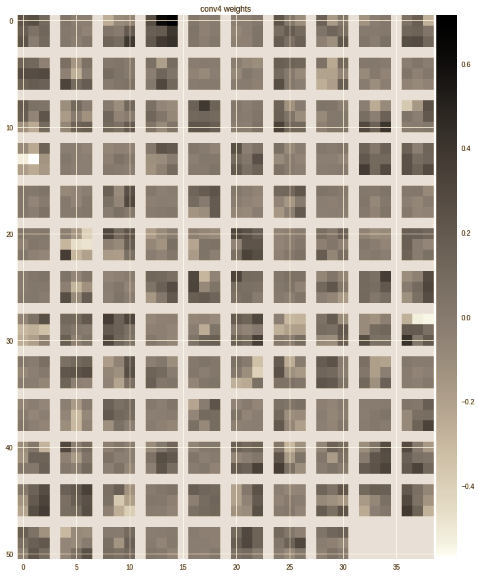

In [233]:
Image("pregunta k conv4.png")

In [ ]:
from keras import backend as K

NUM_LEAVES = 1

def plot_figures(figures, nrows = 1, ncols=1, titles=False):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(sorted(figures.keys(), key=lambda s: int(s[3:]))):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        if titles:
            axeslist.ravel()[ind].set_title(title)

    for ind in range(nrows*ncols):
        axeslist.ravel()[ind].set_axis_off()

    if titles:
        plt.tight_layout()
    plt.show()


def get_dim(num):
    """
    Simple function to get the dimensions of a square-ish shape for plotting
    num images
    """

    s = sqrt(num)
    if round(s) < s:
        return (int(s), int(s)+1)
    else:
        return (int(s)+1, int(s)+1)

# Load the best model
#model = load_model(model_fn)

# Get the convolutional layers
conv_layers = [layer for layer in model.layers if isinstance(layer, MaxPooling2D)]

# Pick random images to visualize
imgs_to_visualize = np.random.choice(np.arange(0, len(x_val)), NUM_LEAVES)

# Use a keras function to extract the conv layer data
convout_func = K.function([model.layers[0].input, K.learning_phase()], [layer.output for layer in conv_layers])
conv_imgs_filts = convout_func([x_val[imgs_to_visualize], 0])
# Also get the prediction so we know what we predicted
predictions = model.predict(x_val[imgs_to_visualize])

imshow = plt.imshow #alias
# Loop through each image disply relevant info
for img_count, img_to_visualize in enumerate(imgs_to_visualize):

    # Get top 3 predictions
    top3_ind = predictions[img_count].argsort()[-3:]
    #top3_species = np.array(LABELS)[top3_ind]
    top3_preds = predictions[img_count][top3_ind]

    # Get the actual leaf species
    #actual = LABELS[y_val[img_to_visualize]]

    # Display the top 3 predictions and the actual species
    #print("Top 3 Predicitons:")
    #for i in range(2, -1, -1):
    #    print("\t%s: %s" % (top3_species[i], top3_preds[i]))
    #print("\nActual: %s" % actual)
  
    print("Predicción: {0}".format(n_largest_setarr(predictions)))
    print("Valor real: {0}".format(y_val[img_to_visualize]))
    
    # Show the original image
    #plt.title("Image used: #%d (digit=%d)" % (img_to_visualize, y_val[img_to_visualize]))
    # For Theano users comment the line below and
    imshow(x_val[img_to_visualize][:, :, 0], cmap='gray')
    # imshow(X_img_val[img_to_visualize][0], cmap='gray') # uncomment this
    plt.tight_layout()
    plt.show()

    # Plot the filter images
    for i, conv_imgs_filt in enumerate(conv_imgs_filts):
        conv_img_filt = conv_imgs_filt[img_count]
        print("Visualizing Convolutions Layer %d" % i)
        # Get it ready for the plot_figures function
        # For Theano users comment the line below and
        fig_dict = {'flt{0}'.format(i): conv_img_filt[:, :, i] for i in range(conv_img_filt.shape[-1])}
        # fig_dict = {'flt{0}'.format(i): conv_img_filt[i] for i in range(conv_img_filt.shape[-1])} # uncomment this
        plot_figures(fig_dict, *get_dim(len(fig_dict)))

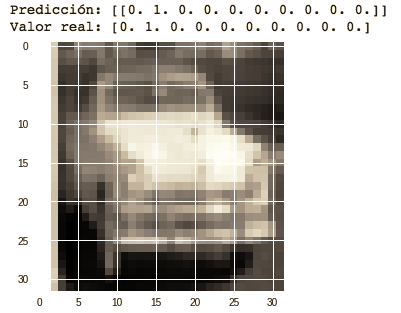

In [234]:
#fotos camion
Image("pregunta k.png")

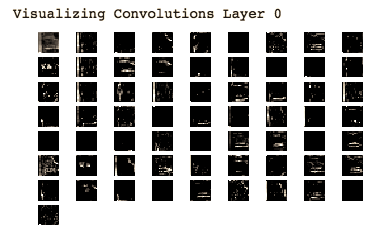

In [235]:
Image("preguntak.png")

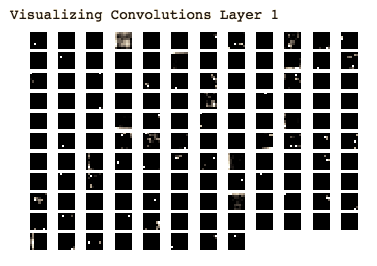

In [236]:
Image("preguntk.png")

In [ ]:
score = model.evaluate(x_test,y_test,batch_size = 50,verbose =0)

acc_k = np.array(history.history['val_acc'])*100


plt.plot(np.arange(25), acc_k, 'ro')
plt.title("Number of epochs vs CNN acc")
plt.xlabel('epochs')
plt.ylabel('acc %')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

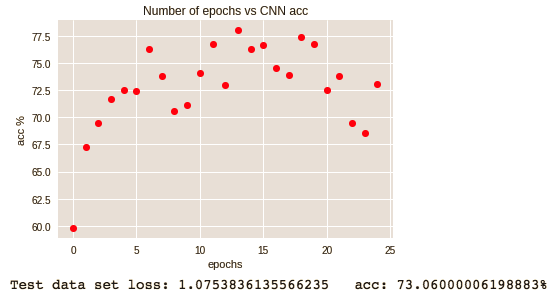

In [237]:
#foto grafico
Image("preguntak grafico final.png")

## 4.- Aplicación de una red neuronal en Localización

En primer lugar se obtienen los datos a partir del archivo csv llamado IndoorFingerprint, luego se obtienen los target a traves de el archivo csv mask_test. Luego se procede a normalizar los datos para asi ingresarlos al modelo.

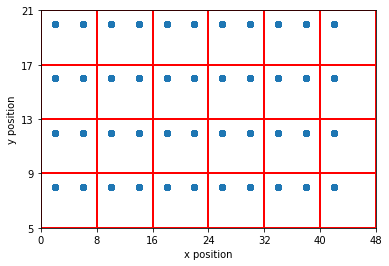

In [79]:
import pandas as pd
df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()

In [200]:
mask_test = np.loadtxt('mask_test.csv',dtype="i")


x_test = df.iloc[mask_test]

y_test = x_test.drop(df.columns[[np.arange(2,10)]], axis = 1)
x_test = x_test.drop(df.columns[[0,1]], axis = 1)

x_train = df.drop(mask_test)
y_train = x_train.drop(df.columns[[np.arange(2,10)]], axis = 1)
x_train = x_train.drop(df.columns[[0,1]], axis = 1)

# Nomalize data
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

scaler_test = StandardScaler().fit(x_test)
x_test_scaled = pd.DataFrame(scaler_test.transform(x_test),columns=x_test.columns)

#x_train_scaled, x_val, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.02, random_state=1)



Luego, es necesario transofrmar los vectores y test e y train a one hot vector debido a que es un problema de categorización. Cabe destacar que probablemente hubiese sido mas escalable y eficiente modelar dos redes, una para la coordenada x y otra para y, debido a que si crecen los límites las clases crecen considerablemente y por consiguiente los one hot vectors también.

In [201]:
def toclass(df):
    class_num = []
    
    for row in df.itertuples():
        if 0 <= row.X <= 8 and 5 <= row.Y <= 9:
                #class0
                class_num.append(0)
        if 8 < row.X <= 16 and 5 <= row.Y <= 9:
                #class1
                class_num.append(1)
        if 16 < row.X <= 24 and 5 <= row.Y <= 9:
                #class2
                class_num.append(2)
        if 24 < row.X <= 32 and 5 <= row.Y <= 9:
                #class3
                class_num.append(3)
        if 32 < row.X <= 40 and 5 <= row.Y <= 9:
                #class4
                class_num.append(4)
        if 40 < row.X <= 48 and 5 <= row.Y <= 9:
                #class5
                class_num.append(5)
                
        if 0 <= row.X <= 8 and 9 < row.Y <= 13:
                #class6
                class_num.append(6)
        if 8 < row.X <= 16 and 9 < row.Y <= 13:
                #class7
                class_num.append(7)
        if 16 < row.X <= 24 and 9 < row.Y <= 13:
                #class8
                class_num.append(8)
        if 24 < row.X <= 32 and 9 < row.Y <= 13:
                #class9
                class_num.append(9)
        if 32 < row.X <= 40 and 9 < row.Y <= 13:
                #class10
                class_num.append(10)
        if 40 < row.X <= 48 and 9 < row.Y <= 13:
                #class11
                class_num.append(11)
                
        if 0 <= row.X <= 8 and 13 < row.Y <= 17:
                #class12
                class_num.append(12)
        if 8 < row.X <= 16 and 13 < row.Y <= 17:
                #class13
                class_num.append(13)
        if 16 < row.X <= 24 and 13 < row.Y <= 17:
                #class14
                class_num.append(14)
        if 24 < row.X <= 32 and 13 < row.Y <= 17:
                #class15
                class_num.append(15)
        if 32 < row.X <= 40 and 13 < row.Y <= 17:
                #class16
                class_num.append(16)
        if 40 < row.X <= 48 and 13 < row.Y <= 17:
                #class17
                class_num.append(17)
                
        if 0 <= row.X <= 8 and 17 < row.Y <= 21:
                #class18
                class_num.append(18)
        if 8 < row.X <= 16 and 17 < row.Y <= 21:
                #class19
                class_num.append(19)
        if 16 < row.X <= 24 and 17 < row.Y <= 21:
                #class20
                class_num.append(20)
        if 24 < row.X <= 32 and 17 < row.Y <= 21:
                #class21
                class_num.append(21)
        if 32 < row.X <= 40 and 17 < row.Y <= 21:
                #class22
                class_num.append(22)
        if 40 < row.X <= 48 and 17 < row.Y <= 21:
                #class23
                class_num.append(23)
        #print("c1 :",row.X,"c2 :",row.Y)
    return class_num

# To categorical (output)
y_test = keras.utils.to_categorical(toclass(y_test))
y_train = keras.utils.to_categorical(toclass(y_train))


In [202]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta


model = Sequential()
model.add(Dense(200, input_dim=x_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, kernel_initializer='glorot_uniform',activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [203]:
hist = model.fit(x_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(x_test_scaled.as_matrix(), y_test))

Train on 4620 samples, validate on 1980 samples
Epoch 1/300
4620/4620 [==============================] - 2s 494us/step - loss: 3.1497 - acc: 0.0690 - val_loss: 3.1073 - val_acc: 0.2106
Epoch 2/300
4620/4620 [==============================] - 1s 175us/step - loss: 3.0783 - acc: 0.2054 - val_loss: 3.0081 - val_acc: 0.3747
Epoch 3/300
4620/4620 [==============================] - 1s 169us/step - loss: 2.9535 - acc: 0.2874 - val_loss: 2.8298 - val_acc: 0.3682
Epoch 4/300
4620/4620 [==============================] - 1s 173us/step - loss: 2.7209 - acc: 0.3145 - val_loss: 2.5080 - val_acc: 0.3692
Epoch 5/300
4620/4620 [==============================] - 1s 173us/step - loss: 2.3383 - acc: 0.3444 - val_loss: 2.0250 - val_acc: 0.4449
Epoch 6/300
4620/4620 [==============================] - 1s 173us/step - loss: 1.9061 - acc: 0.3970 - val_loss: 1.6073 - val_acc: 0.5207
Epoch 7/300
4620/4620 [==============================] - 1s 175us/step - loss: 1.6179 - acc: 0.4550 - val_loss: 1.3493 - val_acc: 

4620/4620 [==============================] - 1s 175us/step - loss: 0.2830 - acc: 0.9048 - val_loss: 0.2454 - val_acc: 0.9182
Epoch 61/300
4620/4620 [==============================] - 1s 173us/step - loss: 0.2760 - acc: 0.9147 - val_loss: 0.2325 - val_acc: 0.9258
Epoch 62/300
4620/4620 [==============================] - 1s 168us/step - loss: 0.2814 - acc: 0.9091 - val_loss: 0.2365 - val_acc: 0.9212
Epoch 63/300
4620/4620 [==============================] - 1s 176us/step - loss: 0.2799 - acc: 0.9065 - val_loss: 0.2503 - val_acc: 0.9162
Epoch 64/300
4620/4620 [==============================] - 1s 173us/step - loss: 0.2680 - acc: 0.9149 - val_loss: 0.2318 - val_acc: 0.9242
Epoch 65/300
4620/4620 [==============================] - 1s 175us/step - loss: 0.2549 - acc: 0.9186 - val_loss: 0.2494 - val_acc: 0.9222
Epoch 66/300
4620/4620 [==============================] - 1s 173us/step - loss: 0.2571 - acc: 0.9190 - val_loss: 0.2236 - val_acc: 0.9278
Epoch 67/300
4620/4620 [=======================

4620/4620 [==============================] - 1s 176us/step - loss: 0.1488 - acc: 0.9567 - val_loss: 0.1619 - val_acc: 0.9485
Epoch 120/300
4620/4620 [==============================] - 1s 167us/step - loss: 0.1528 - acc: 0.9513 - val_loss: 0.1515 - val_acc: 0.9535
Epoch 121/300
4620/4620 [==============================] - 1s 174us/step - loss: 0.1422 - acc: 0.9584 - val_loss: 0.1740 - val_acc: 0.9399
Epoch 122/300
4620/4620 [==============================] - 1s 172us/step - loss: 0.1589 - acc: 0.9491 - val_loss: 0.1566 - val_acc: 0.9500
Epoch 123/300
4620/4620 [==============================] - 1s 176us/step - loss: 0.1501 - acc: 0.9545 - val_loss: 0.1442 - val_acc: 0.9566
Epoch 124/300
4620/4620 [==============================] - 1s 180us/step - loss: 0.1410 - acc: 0.9595 - val_loss: 0.2000 - val_acc: 0.9429
Epoch 125/300
4620/4620 [==============================] - 1s 175us/step - loss: 0.1464 - acc: 0.9567 - val_loss: 0.1517 - val_acc: 0.9530
Epoch 126/300
4620/4620 [================

4620/4620 [==============================] - 1s 174us/step - loss: 0.1120 - acc: 0.9703 - val_loss: 0.1410 - val_acc: 0.9576
Epoch 179/300
4620/4620 [==============================] - 1s 167us/step - loss: 0.1062 - acc: 0.9710 - val_loss: 0.1328 - val_acc: 0.9566
Epoch 180/300
4620/4620 [==============================] - 1s 166us/step - loss: 0.1020 - acc: 0.9740 - val_loss: 0.1420 - val_acc: 0.9535
Epoch 181/300
4620/4620 [==============================] - 1s 169us/step - loss: 0.1084 - acc: 0.9682 - val_loss: 0.1294 - val_acc: 0.9601
Epoch 182/300
4620/4620 [==============================] - 1s 168us/step - loss: 0.1024 - acc: 0.9716 - val_loss: 0.1284 - val_acc: 0.9566
Epoch 183/300
4620/4620 [==============================] - 1s 166us/step - loss: 0.1058 - acc: 0.9721 - val_loss: 0.1453 - val_acc: 0.9551
Epoch 184/300
4620/4620 [==============================] - 1s 167us/step - loss: 0.1015 - acc: 0.9738 - val_loss: 0.1424 - val_acc: 0.9535
Epoch 185/300
4620/4620 [================

4620/4620 [==============================] - 1s 183us/step - loss: 0.0821 - acc: 0.9786 - val_loss: 0.1208 - val_acc: 0.9616
Epoch 238/300
4620/4620 [==============================] - 1s 183us/step - loss: 0.0818 - acc: 0.9801 - val_loss: 0.1145 - val_acc: 0.9616
Epoch 239/300
4620/4620 [==============================] - 1s 182us/step - loss: 0.0813 - acc: 0.9797 - val_loss: 0.1231 - val_acc: 0.9606
Epoch 240/300
4620/4620 [==============================] - 1s 188us/step - loss: 0.0820 - acc: 0.9797 - val_loss: 0.1489 - val_acc: 0.9591
Epoch 241/300
4620/4620 [==============================] - 1s 197us/step - loss: 0.0809 - acc: 0.9794 - val_loss: 0.1477 - val_acc: 0.9556
Epoch 242/300
4620/4620 [==============================] - 1s 184us/step - loss: 0.0836 - acc: 0.9775 - val_loss: 0.1413 - val_acc: 0.9520
Epoch 243/300
4620/4620 [==============================] - 1s 191us/step - loss: 0.0809 - acc: 0.9792 - val_loss: 0.1106 - val_acc: 0.9657
Epoch 244/300
4620/4620 [================

4620/4620 [==============================] - 1s 152us/step - loss: 0.0677 - acc: 0.9825 - val_loss: 0.1189 - val_acc: 0.9636
Epoch 297/300
4620/4620 [==============================] - 1s 175us/step - loss: 0.0707 - acc: 0.9820 - val_loss: 0.1236 - val_acc: 0.9641
Epoch 298/300
4620/4620 [==============================] - 1s 191us/step - loss: 0.0688 - acc: 0.9827 - val_loss: 0.1487 - val_acc: 0.9571
Epoch 299/300
4620/4620 [==============================] - 1s 231us/step - loss: 0.0718 - acc: 0.9833 - val_loss: 0.1245 - val_acc: 0.9616
Epoch 300/300
4620/4620 [==============================] - 1s 269us/step - loss: 0.0703 - acc: 0.9823 - val_loss: 0.1303 - val_acc: 0.9621


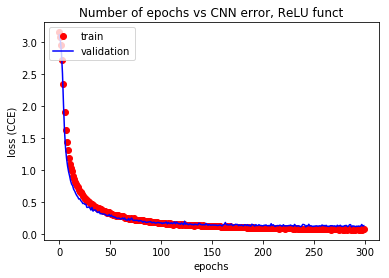

Test data set loss: 0.13026498473188228	 acc: 96.21212082077759%


In [204]:
score = model.evaluate(x_test_scaled,y_test,batch_size = 50,verbose =0)

loss_training_e = np.array(hist.history['loss'])
loss_val_e = np.array(hist.history['val_loss'])

plt.plot(np.arange(300), loss_training_e, 'ro')
plt.plot(np.arange(300), loss_val_e, 'b-')
plt.title("Number of epochs vs CNN error, ReLU funct")
plt.xlabel('epochs')
plt.ylabel('loss (CCE)')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Test data set loss: {0}\t acc: {1}%".format(score[0],score[1]*100))

Se puede apreciar a partir del gráfico y los datos mostrados que la red tiene buen desempeño tanto en el entrenamiento como en la validación.